In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.6 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%10000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/davis-graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/davis-graphs/ProteinGraphs/'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/davis-graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")


<ipython-input-2-790bcf1bddea>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-790bcf1bddea>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 10000 as prepared_samples/sample_10000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModel1
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:31<?, ?epoch/s]

[Epoch 1/250] Training Loss: 2.7077


Training:   0%|          | 1/250 [01:04<4:26:49, 64.30s/epoch]

  Train => MSE=0.7167, CI=0.6605, Pearson=0.2732
  Test  => MSE=0.7525, CI=0.6672, Pearson=0.2884
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [01:32<4:26:49, 64.30s/epoch]

[Epoch 2/250] Training Loss: 0.7900


Training:   1%|          | 2/250 [02:03<4:13:36, 61.36s/epoch]

  Train => MSE=0.6842, CI=0.6907, Pearson=0.3530
  Test  => MSE=0.7109, CI=0.7026, Pearson=0.3780
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch1.pt


Training:   1%|          | 2/250 [02:31<4:13:36, 61.36s/epoch]

[Epoch 3/250] Training Loss: 0.7544


Training:   1%|          | 3/250 [03:02<4:08:02, 60.25s/epoch]

  Train => MSE=0.8729, CI=0.7218, Pearson=0.4256
  Test  => MSE=0.9000, CI=0.7325, Pearson=0.4554
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch2.pt


Training:   1%|          | 3/250 [03:30<4:08:02, 60.25s/epoch]

[Epoch 4/250] Training Loss: 0.7588


Training:   2%|▏         | 4/250 [04:01<4:04:53, 59.73s/epoch]

  Train => MSE=0.7250, CI=0.7368, Pearson=0.4555
  Test  => MSE=0.7455, CI=0.7458, Pearson=0.4860
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch3.pt


Training:   2%|▏         | 4/250 [04:29<4:04:53, 59.73s/epoch]

[Epoch 5/250] Training Loss: 0.7205


Training:   2%|▏         | 5/250 [05:00<4:03:07, 59.54s/epoch]

  Train => MSE=0.6258, CI=0.7471, Pearson=0.4788
  Test  => MSE=0.6429, CI=0.7541, Pearson=0.5062
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch4.pt


Training:   2%|▏         | 5/250 [05:29<4:03:07, 59.54s/epoch]

[Epoch 6/250] Training Loss: 0.6600


Training:   2%|▏         | 6/250 [06:00<4:02:05, 59.53s/epoch]

  Train => MSE=0.6249, CI=0.7528, Pearson=0.4948
  Test  => MSE=0.6428, CI=0.7590, Pearson=0.5203
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch5.pt


Training:   2%|▏         | 6/250 [06:28<4:02:05, 59.53s/epoch]

[Epoch 7/250] Training Loss: 0.6617


Training:   3%|▎         | 7/250 [06:59<4:00:39, 59.42s/epoch]

  Train => MSE=0.6160, CI=0.7579, Pearson=0.5043
  Test  => MSE=0.6328, CI=0.7645, Pearson=0.5297
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch6.pt


Training:   3%|▎         | 7/250 [07:27<4:00:39, 59.42s/epoch]

[Epoch 8/250] Training Loss: 0.6539


Training:   3%|▎         | 8/250 [07:58<3:59:22, 59.35s/epoch]

  Train => MSE=0.5908, CI=0.7615, Pearson=0.5144
  Test  => MSE=0.6097, CI=0.7659, Pearson=0.5361
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch7.pt


Training:   3%|▎         | 8/250 [08:27<3:59:22, 59.35s/epoch]

[Epoch 9/250] Training Loss: 0.6474


Training:   4%|▎         | 9/250 [08:58<3:59:06, 59.53s/epoch]

  Train => MSE=0.5500, CI=0.7644, Pearson=0.5175
  Test  => MSE=0.5665, CI=0.7687, Pearson=0.5392
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch8.pt


Training:   4%|▎         | 9/250 [09:27<3:59:06, 59.53s/epoch]

[Epoch 10/250] Training Loss: 0.6340


Training:   4%|▍         | 10/250 [09:58<3:58:55, 59.73s/epoch]

  Train => MSE=0.5429, CI=0.7674, Pearson=0.5268
  Test  => MSE=0.5593, CI=0.7721, Pearson=0.5467
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch9.pt


Training:   4%|▍         | 10/250 [10:27<3:58:55, 59.73s/epoch]

[Epoch 11/250] Training Loss: 0.6206


Training:   4%|▍         | 11/250 [10:58<3:57:45, 59.69s/epoch]

  Train => MSE=0.5759, CI=0.7709, Pearson=0.5323
  Test  => MSE=0.5959, CI=0.7752, Pearson=0.5515
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch10.pt


Training:   4%|▍         | 11/250 [11:27<3:57:45, 59.69s/epoch]

[Epoch 12/250] Training Loss: 0.6305


Training:   5%|▍         | 12/250 [11:58<3:57:10, 59.79s/epoch]

  Train => MSE=0.5996, CI=0.7730, Pearson=0.5319
  Test  => MSE=0.6213, CI=0.7766, Pearson=0.5510
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch11.pt


Training:   5%|▍         | 12/250 [12:27<3:57:10, 59.79s/epoch]

[Epoch 13/250] Training Loss: 0.6078


Training:   5%|▌         | 13/250 [12:58<3:56:45, 59.94s/epoch]

  Train => MSE=0.6910, CI=0.7776, Pearson=0.5394
  Test  => MSE=0.7153, CI=0.7815, Pearson=0.5570
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch12.pt


Training:   5%|▌         | 13/250 [13:27<3:56:45, 59.94s/epoch]

[Epoch 14/250] Training Loss: 0.6226


Training:   6%|▌         | 14/250 [13:58<3:55:57, 59.99s/epoch]

  Train => MSE=0.5441, CI=0.7790, Pearson=0.5409
  Test  => MSE=0.5613, CI=0.7829, Pearson=0.5585
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch13.pt


Training:   6%|▌         | 14/250 [14:27<3:55:57, 59.99s/epoch]

[Epoch 15/250] Training Loss: 0.5910


Training:   6%|▌         | 15/250 [14:58<3:54:24, 59.85s/epoch]

  Train => MSE=0.5411, CI=0.7815, Pearson=0.5443
  Test  => MSE=0.5584, CI=0.7860, Pearson=0.5619
Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch14.pt


Training:   6%|▌         | 15/250 [15:26<3:54:24, 59.85s/epoch]

[Epoch 16/250] Training Loss: 0.5899


Training:   6%|▋         | 16/250 [15:58<3:53:21, 59.83s/epoch]

  Train => MSE=0.5662, CI=0.7804, Pearson=0.5541
  Test  => MSE=0.5880, CI=0.7833, Pearson=0.5683
Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch15.pt


Training:   6%|▋         | 16/250 [16:26<3:53:21, 59.83s/epoch]

[Epoch 17/250] Training Loss: 0.5926


Training:   7%|▋         | 17/250 [16:58<3:52:41, 59.92s/epoch]

  Train => MSE=0.5429, CI=0.7830, Pearson=0.5484
  Test  => MSE=0.5626, CI=0.7876, Pearson=0.5652
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch16.pt


Training:   7%|▋         | 17/250 [17:26<3:52:41, 59.92s/epoch]

[Epoch 18/250] Training Loss: 0.5824


Training:   7%|▋         | 18/250 [17:58<3:51:43, 59.93s/epoch]

  Train => MSE=0.5625, CI=0.7840, Pearson=0.5654
  Test  => MSE=0.5846, CI=0.7874, Pearson=0.5793
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch17.pt


Training:   7%|▋         | 18/250 [18:26<3:51:43, 59.93s/epoch]

[Epoch 19/250] Training Loss: 0.5838


Training:   8%|▊         | 19/250 [18:58<3:51:03, 60.02s/epoch]

  Train => MSE=0.5012, CI=0.7876, Pearson=0.5759
  Test  => MSE=0.5198, CI=0.7905, Pearson=0.5871
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch18.pt


Training:   8%|▊         | 19/250 [19:26<3:51:03, 60.02s/epoch]

[Epoch 20/250] Training Loss: 0.5669


Training:   8%|▊         | 20/250 [19:58<3:49:42, 59.93s/epoch]

  Train => MSE=0.4968, CI=0.7917, Pearson=0.5874
  Test  => MSE=0.5182, CI=0.7933, Pearson=0.5954
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch19.pt


Training:   8%|▊         | 20/250 [20:26<3:49:42, 59.93s/epoch]

[Epoch 21/250] Training Loss: 0.5529


Training:   8%|▊         | 21/250 [20:58<3:48:49, 59.95s/epoch]

  Train => MSE=0.4803, CI=0.7949, Pearson=0.5973
  Test  => MSE=0.5001, CI=0.7980, Pearson=0.6055
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch20.pt


Training:   8%|▊         | 21/250 [21:26<3:48:49, 59.95s/epoch]

[Epoch 22/250] Training Loss: 0.5558


Training:   9%|▉         | 22/250 [21:57<3:47:14, 59.80s/epoch]

  Train => MSE=0.4752, CI=0.7952, Pearson=0.6014
  Test  => MSE=0.4902, CI=0.7981, Pearson=0.6112
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch21.pt


Training:   9%|▉         | 22/250 [22:26<3:47:14, 59.80s/epoch]

[Epoch 23/250] Training Loss: 0.5585


Training:   9%|▉         | 23/250 [22:57<3:45:57, 59.72s/epoch]

  Train => MSE=0.4687, CI=0.8000, Pearson=0.6101
  Test  => MSE=0.4911, CI=0.8037, Pearson=0.6148
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch22.pt


Training:   9%|▉         | 23/250 [23:25<3:45:57, 59.72s/epoch]

[Epoch 24/250] Training Loss: 0.5507


Training:  10%|▉         | 24/250 [23:56<3:44:46, 59.67s/epoch]

  Train => MSE=0.4653, CI=0.8045, Pearson=0.6179
  Test  => MSE=0.4836, CI=0.8103, Pearson=0.6279
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch23.pt


Training:  10%|▉         | 24/250 [24:25<3:44:46, 59.67s/epoch]

[Epoch 25/250] Training Loss: 0.5378


Training:  10%|█         | 25/250 [24:55<3:43:26, 59.58s/epoch]

  Train => MSE=0.4611, CI=0.8034, Pearson=0.6180
  Test  => MSE=0.4769, CI=0.8068, Pearson=0.6243
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch24.pt


Training:  10%|█         | 25/250 [25:24<3:43:26, 59.58s/epoch]

[Epoch 26/250] Training Loss: 0.5286


Training:  10%|█         | 26/250 [25:55<3:42:25, 59.58s/epoch]

  Train => MSE=0.4515, CI=0.8076, Pearson=0.6243
  Test  => MSE=0.4693, CI=0.8123, Pearson=0.6304
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch25.pt


Training:  10%|█         | 26/250 [26:24<3:42:25, 59.58s/epoch]

[Epoch 27/250] Training Loss: 0.5334


Training:  11%|█         | 27/250 [26:55<3:42:06, 59.76s/epoch]

  Train => MSE=0.4547, CI=0.8083, Pearson=0.6252
  Test  => MSE=0.4736, CI=0.8130, Pearson=0.6326
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch26.pt


Training:  11%|█         | 27/250 [27:24<3:42:06, 59.76s/epoch]

[Epoch 28/250] Training Loss: 0.5338


Training:  11%|█         | 28/250 [27:55<3:41:31, 59.87s/epoch]

  Train => MSE=0.4543, CI=0.8095, Pearson=0.6321
  Test  => MSE=0.4765, CI=0.8136, Pearson=0.6366
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch27.pt


Training:  11%|█         | 28/250 [28:24<3:41:31, 59.87s/epoch]

[Epoch 29/250] Training Loss: 0.5290


Training:  12%|█▏        | 29/250 [28:55<3:40:03, 59.74s/epoch]

  Train => MSE=0.4529, CI=0.8100, Pearson=0.6361
  Test  => MSE=0.4728, CI=0.8154, Pearson=0.6431
Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch28.pt


Training:  12%|█▏        | 29/250 [29:24<3:40:03, 59.74s/epoch]

[Epoch 30/250] Training Loss: 0.5266


Training:  12%|█▏        | 30/250 [29:55<3:39:06, 59.76s/epoch]

  Train => MSE=0.4461, CI=0.8073, Pearson=0.6323
  Test  => MSE=0.4654, CI=0.8115, Pearson=0.6347
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch29.pt


Training:  12%|█▏        | 30/250 [30:23<3:39:06, 59.76s/epoch]

[Epoch 31/250] Training Loss: 0.5227


Training:  12%|█▏        | 31/250 [30:54<3:38:00, 59.73s/epoch]

  Train => MSE=0.4395, CI=0.8121, Pearson=0.6385
  Test  => MSE=0.4597, CI=0.8165, Pearson=0.6427
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch30.pt


Training:  12%|█▏        | 31/250 [31:23<3:38:00, 59.73s/epoch]

[Epoch 32/250] Training Loss: 0.5145


Training:  13%|█▎        | 32/250 [31:54<3:37:12, 59.78s/epoch]

  Train => MSE=0.4392, CI=0.8123, Pearson=0.6382
  Test  => MSE=0.4614, CI=0.8152, Pearson=0.6399
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch31.pt


Training:  13%|█▎        | 32/250 [32:23<3:37:12, 59.78s/epoch]

[Epoch 33/250] Training Loss: 0.5231


Training:  13%|█▎        | 33/250 [32:54<3:36:31, 59.87s/epoch]

  Train => MSE=0.4398, CI=0.8145, Pearson=0.6468
  Test  => MSE=0.4620, CI=0.8198, Pearson=0.6509
Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch32.pt


Training:  13%|█▎        | 33/250 [33:23<3:36:31, 59.87s/epoch]

[Epoch 34/250] Training Loss: 0.5087


Training:  14%|█▎        | 34/250 [33:55<3:36:00, 60.00s/epoch]

  Train => MSE=0.4409, CI=0.8164, Pearson=0.6479
  Test  => MSE=0.4629, CI=0.8206, Pearson=0.6519
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch33.pt


Training:  14%|█▎        | 34/250 [34:23<3:36:00, 60.00s/epoch]

[Epoch 35/250] Training Loss: 0.5028


Training:  14%|█▍        | 35/250 [34:54<3:34:49, 59.95s/epoch]

  Train => MSE=0.4382, CI=0.8185, Pearson=0.6518
  Test  => MSE=0.4609, CI=0.8229, Pearson=0.6549
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch34.pt


Training:  14%|█▍        | 35/250 [35:24<3:34:49, 59.95s/epoch]

[Epoch 36/250] Training Loss: 0.5087


Training:  14%|█▍        | 36/250 [35:55<3:34:47, 60.22s/epoch]

  Train => MSE=0.4532, CI=0.8153, Pearson=0.6524
  Test  => MSE=0.4807, CI=0.8192, Pearson=0.6517
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch35.pt


Training:  14%|█▍        | 36/250 [36:24<3:34:47, 60.22s/epoch]

[Epoch 37/250] Training Loss: 0.5054


Training:  15%|█▍        | 37/250 [36:56<3:34:23, 60.39s/epoch]

  Train => MSE=0.4262, CI=0.8186, Pearson=0.6515
  Test  => MSE=0.4470, CI=0.8215, Pearson=0.6524
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch36.pt


Training:  15%|█▍        | 37/250 [37:24<3:34:23, 60.39s/epoch]

[Epoch 38/250] Training Loss: 0.5032


Training:  15%|█▌        | 38/250 [37:55<3:32:25, 60.12s/epoch]

  Train => MSE=0.4426, CI=0.8176, Pearson=0.6492
  Test  => MSE=0.4609, CI=0.8204, Pearson=0.6484
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch37.pt


Training:  15%|█▌        | 38/250 [38:24<3:32:25, 60.12s/epoch]

[Epoch 39/250] Training Loss: 0.4936


Training:  16%|█▌        | 39/250 [38:55<3:30:32, 59.87s/epoch]

  Train => MSE=0.4345, CI=0.8178, Pearson=0.6530
  Test  => MSE=0.4520, CI=0.8215, Pearson=0.6536
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch38.pt


Training:  16%|█▌        | 39/250 [39:24<3:30:32, 59.87s/epoch]

[Epoch 40/250] Training Loss: 0.5068


Training:  16%|█▌        | 40/250 [39:54<3:29:20, 59.81s/epoch]

  Train => MSE=0.4277, CI=0.8210, Pearson=0.6602
  Test  => MSE=0.4532, CI=0.8238, Pearson=0.6592
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch39.pt


Training:  16%|█▌        | 40/250 [40:23<3:29:20, 59.81s/epoch]

[Epoch 41/250] Training Loss: 0.5004


Training:  16%|█▋        | 41/250 [40:54<3:27:47, 59.65s/epoch]

  Train => MSE=0.4172, CI=0.8211, Pearson=0.6622
  Test  => MSE=0.4400, CI=0.8251, Pearson=0.6623
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch40.pt


Training:  16%|█▋        | 41/250 [41:22<3:27:47, 59.65s/epoch]

[Epoch 42/250] Training Loss: 0.4824


Training:  17%|█▋        | 42/250 [41:53<3:26:52, 59.68s/epoch]

  Train => MSE=0.4151, CI=0.8209, Pearson=0.6645
  Test  => MSE=0.4430, CI=0.8226, Pearson=0.6593
Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch41.pt


Training:  17%|█▋        | 42/250 [42:22<3:26:52, 59.68s/epoch]

[Epoch 43/250] Training Loss: 0.4873


Training:  17%|█▋        | 43/250 [42:53<3:25:48, 59.66s/epoch]

  Train => MSE=0.4184, CI=0.8198, Pearson=0.6628
  Test  => MSE=0.4448, CI=0.8208, Pearson=0.6561
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch42.pt


Training:  17%|█▋        | 43/250 [43:22<3:25:48, 59.66s/epoch]

[Epoch 44/250] Training Loss: 0.4928


Training:  18%|█▊        | 44/250 [43:53<3:24:50, 59.66s/epoch]

  Train => MSE=0.4195, CI=0.8234, Pearson=0.6686
  Test  => MSE=0.4508, CI=0.8249, Pearson=0.6607
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch43.pt


Training:  18%|█▊        | 44/250 [44:21<3:24:50, 59.66s/epoch]

[Epoch 45/250] Training Loss: 0.4961


Training:  18%|█▊        | 45/250 [44:52<3:23:40, 59.61s/epoch]

  Train => MSE=0.4334, CI=0.8195, Pearson=0.6704
  Test  => MSE=0.4647, CI=0.8217, Pearson=0.6641
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch44.pt


Training:  18%|█▊        | 45/250 [45:21<3:23:40, 59.61s/epoch]

[Epoch 46/250] Training Loss: 0.4889


Training:  18%|█▊        | 46/250 [45:52<3:23:02, 59.72s/epoch]

  Train => MSE=0.4094, CI=0.8219, Pearson=0.6679
  Test  => MSE=0.4416, CI=0.8207, Pearson=0.6566
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch45.pt


Training:  18%|█▊        | 46/250 [46:21<3:23:02, 59.72s/epoch]

[Epoch 47/250] Training Loss: 0.4845


Training:  19%|█▉        | 47/250 [46:51<3:21:37, 59.59s/epoch]

  Train => MSE=0.4247, CI=0.8208, Pearson=0.6694
  Test  => MSE=0.4603, CI=0.8202, Pearson=0.6580
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch46.pt


Training:  19%|█▉        | 47/250 [47:20<3:21:37, 59.59s/epoch]

[Epoch 48/250] Training Loss: 0.4793


Training:  19%|█▉        | 48/250 [47:51<3:20:57, 59.69s/epoch]

  Train => MSE=0.4055, CI=0.8223, Pearson=0.6748
  Test  => MSE=0.4383, CI=0.8223, Pearson=0.6644
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch47.pt


Training:  19%|█▉        | 48/250 [48:20<3:20:57, 59.69s/epoch]

[Epoch 49/250] Training Loss: 0.4833


Training:  20%|█▉        | 49/250 [48:51<3:19:29, 59.55s/epoch]

  Train => MSE=0.4191, CI=0.8174, Pearson=0.6661
  Test  => MSE=0.4474, CI=0.8163, Pearson=0.6593
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch48.pt


Training:  20%|█▉        | 49/250 [49:19<3:19:29, 59.55s/epoch]

[Epoch 50/250] Training Loss: 0.4819


Training:  20%|██        | 50/250 [49:50<3:18:35, 59.58s/epoch]

  Train => MSE=0.4067, CI=0.8254, Pearson=0.6752
  Test  => MSE=0.4398, CI=0.8255, Pearson=0.6647
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch49.pt


Training:  20%|██        | 50/250 [50:19<3:18:35, 59.58s/epoch]

[Epoch 51/250] Training Loss: 0.4791


Training:  20%|██        | 51/250 [50:50<3:17:50, 59.65s/epoch]

  Train => MSE=0.4066, CI=0.8236, Pearson=0.6746
  Test  => MSE=0.4400, CI=0.8230, Pearson=0.6634
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch50.pt


Training:  20%|██        | 51/250 [51:19<3:17:50, 59.65s/epoch]

[Epoch 52/250] Training Loss: 0.4735


Training:  21%|██        | 52/250 [51:51<3:17:38, 59.89s/epoch]

  Train => MSE=0.4050, CI=0.8236, Pearson=0.6767
  Test  => MSE=0.4388, CI=0.8240, Pearson=0.6653
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch51.pt


Training:  21%|██        | 52/250 [52:19<3:17:38, 59.89s/epoch]

[Epoch 53/250] Training Loss: 0.4698


Training:  21%|██        | 53/250 [52:50<3:16:28, 59.84s/epoch]

  Train => MSE=0.4024, CI=0.8221, Pearson=0.6762
  Test  => MSE=0.4359, CI=0.8196, Pearson=0.6647
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch52.pt


Training:  21%|██        | 53/250 [53:19<3:16:28, 59.84s/epoch]

[Epoch 54/250] Training Loss: 0.4869


Training:  22%|██▏       | 54/250 [53:50<3:15:21, 59.81s/epoch]

  Train => MSE=0.4120, CI=0.8196, Pearson=0.6726
  Test  => MSE=0.4454, CI=0.8174, Pearson=0.6619
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch53.pt


Training:  22%|██▏       | 54/250 [54:19<3:15:21, 59.81s/epoch]

[Epoch 55/250] Training Loss: 0.4671


Training:  22%|██▏       | 55/250 [54:51<3:15:18, 60.10s/epoch]

  Train => MSE=0.4038, CI=0.8247, Pearson=0.6775
  Test  => MSE=0.4409, CI=0.8207, Pearson=0.6627
Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch54.pt


Training:  22%|██▏       | 55/250 [55:19<3:15:18, 60.10s/epoch]

[Epoch 56/250] Training Loss: 0.4682


Training:  22%|██▏       | 56/250 [55:51<3:14:02, 60.01s/epoch]

  Train => MSE=0.4088, CI=0.8186, Pearson=0.6780
  Test  => MSE=0.4455, CI=0.8148, Pearson=0.6642
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch55.pt


Training:  22%|██▏       | 56/250 [56:19<3:14:02, 60.01s/epoch]

[Epoch 57/250] Training Loss: 0.4668


Training:  23%|██▎       | 57/250 [56:51<3:13:08, 60.05s/epoch]

  Train => MSE=0.4009, CI=0.8234, Pearson=0.6764
  Test  => MSE=0.4380, CI=0.8188, Pearson=0.6607
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch56.pt


Training:  23%|██▎       | 57/250 [57:20<3:13:08, 60.05s/epoch]

[Epoch 58/250] Training Loss: 0.4733


Training:  23%|██▎       | 58/250 [57:50<3:11:48, 59.94s/epoch]

  Train => MSE=0.3999, CI=0.8231, Pearson=0.6821
  Test  => MSE=0.4364, CI=0.8213, Pearson=0.6671
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch57.pt


Training:  23%|██▎       | 58/250 [58:19<3:11:48, 59.94s/epoch]

[Epoch 59/250] Training Loss: 0.4751


Training:  24%|██▎       | 59/250 [58:50<3:10:51, 59.95s/epoch]

  Train => MSE=0.3997, CI=0.8269, Pearson=0.6850
  Test  => MSE=0.4326, CI=0.8246, Pearson=0.6749
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch58.pt


Training:  24%|██▎       | 59/250 [59:19<3:10:51, 59.95s/epoch]

[Epoch 60/250] Training Loss: 0.4699


Training:  24%|██▍       | 60/250 [59:50<3:09:43, 59.92s/epoch]

  Train => MSE=0.4123, CI=0.8214, Pearson=0.6825
  Test  => MSE=0.4507, CI=0.8176, Pearson=0.6678
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch59.pt


Training:  24%|██▍       | 60/250 [1:00:19<3:09:43, 59.92s/epoch]

[Epoch 61/250] Training Loss: 0.4609


Training:  24%|██▍       | 61/250 [1:00:50<3:08:40, 59.90s/epoch]

  Train => MSE=0.3936, CI=0.8252, Pearson=0.6854
  Test  => MSE=0.4302, CI=0.8182, Pearson=0.6702
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch60.pt


Training:  24%|██▍       | 61/250 [1:01:18<3:08:40, 59.90s/epoch]

[Epoch 62/250] Training Loss: 0.4553


Training:  25%|██▍       | 62/250 [1:01:50<3:07:19, 59.79s/epoch]

  Train => MSE=0.3848, CI=0.8279, Pearson=0.6933
  Test  => MSE=0.4211, CI=0.8233, Pearson=0.6775
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch61.pt


Training:  25%|██▍       | 62/250 [1:02:18<3:07:19, 59.79s/epoch]

[Epoch 63/250] Training Loss: 0.4599


Training:  25%|██▌       | 63/250 [1:02:49<3:05:39, 59.57s/epoch]

  Train => MSE=0.3947, CI=0.8256, Pearson=0.6870
  Test  => MSE=0.4311, CI=0.8216, Pearson=0.6726
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch62.pt


Training:  25%|██▌       | 63/250 [1:03:18<3:05:39, 59.57s/epoch]

[Epoch 64/250] Training Loss: 0.4542


Training:  26%|██▌       | 64/250 [1:03:49<3:05:02, 59.69s/epoch]

  Train => MSE=0.3955, CI=0.8249, Pearson=0.6953
  Test  => MSE=0.4375, CI=0.8187, Pearson=0.6759
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch63.pt


Training:  26%|██▌       | 64/250 [1:04:17<3:05:02, 59.69s/epoch]

[Epoch 65/250] Training Loss: 0.4560


Training:  26%|██▌       | 65/250 [1:04:48<3:03:35, 59.54s/epoch]

  Train => MSE=0.3852, CI=0.8256, Pearson=0.6988
  Test  => MSE=0.4239, CI=0.8187, Pearson=0.6793
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch64.pt


Training:  26%|██▌       | 65/250 [1:05:17<3:03:35, 59.54s/epoch]

[Epoch 66/250] Training Loss: 0.4459


Training:  26%|██▋       | 66/250 [1:05:48<3:02:47, 59.61s/epoch]

  Train => MSE=0.3922, CI=0.8278, Pearson=0.6955
  Test  => MSE=0.4261, CI=0.8230, Pearson=0.6800
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch65.pt


Training:  26%|██▋       | 66/250 [1:06:16<3:02:47, 59.61s/epoch]

[Epoch 67/250] Training Loss: 0.4595


Training:  27%|██▋       | 67/250 [1:06:47<3:01:59, 59.67s/epoch]

  Train => MSE=0.3814, CI=0.8223, Pearson=0.6997
  Test  => MSE=0.4190, CI=0.8162, Pearson=0.6836
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch66.pt


Training:  27%|██▋       | 67/250 [1:07:16<3:01:59, 59.67s/epoch]

[Epoch 68/250] Training Loss: 0.4414


Training:  27%|██▋       | 68/250 [1:07:47<3:01:10, 59.73s/epoch]

  Train => MSE=0.4127, CI=0.8090, Pearson=0.6980
  Test  => MSE=0.4590, CI=0.8003, Pearson=0.6738
Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch67.pt


Training:  27%|██▋       | 68/250 [1:08:16<3:01:10, 59.73s/epoch]

[Epoch 69/250] Training Loss: 0.4566


Training:  28%|██▊       | 69/250 [1:08:47<3:00:00, 59.67s/epoch]

  Train => MSE=0.3738, CI=0.8302, Pearson=0.7068
  Test  => MSE=0.4113, CI=0.8228, Pearson=0.6899
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch68.pt


Training:  28%|██▊       | 69/250 [1:09:15<3:00:00, 59.67s/epoch]

[Epoch 70/250] Training Loss: 0.4306


Training:  28%|██▊       | 70/250 [1:09:47<2:59:22, 59.79s/epoch]

  Train => MSE=0.3671, CI=0.8289, Pearson=0.7145
  Test  => MSE=0.4116, CI=0.8188, Pearson=0.6915
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch69.pt


Training:  28%|██▊       | 70/250 [1:10:15<2:59:22, 59.79s/epoch]

[Epoch 71/250] Training Loss: 0.4288


Training:  28%|██▊       | 71/250 [1:10:46<2:58:07, 59.70s/epoch]

  Train => MSE=0.3681, CI=0.8351, Pearson=0.7208
  Test  => MSE=0.4155, CI=0.8264, Pearson=0.6951
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch70.pt


Training:  28%|██▊       | 71/250 [1:11:15<2:58:07, 59.70s/epoch]

[Epoch 72/250] Training Loss: 0.4400


Training:  29%|██▉       | 72/250 [1:11:46<2:56:55, 59.64s/epoch]

  Train => MSE=0.3765, CI=0.8281, Pearson=0.7016
  Test  => MSE=0.4201, CI=0.8193, Pearson=0.6793
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch71.pt


Training:  29%|██▉       | 72/250 [1:12:15<2:56:55, 59.64s/epoch]

[Epoch 73/250] Training Loss: 0.4295


Training:  29%|██▉       | 73/250 [1:12:46<2:56:29, 59.83s/epoch]

  Train => MSE=0.3617, CI=0.8282, Pearson=0.7152
  Test  => MSE=0.4080, CI=0.8163, Pearson=0.6893
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch72.pt


Training:  29%|██▉       | 73/250 [1:13:15<2:56:29, 59.83s/epoch]

[Epoch 74/250] Training Loss: 0.4322


Training:  30%|██▉       | 74/250 [1:13:46<2:55:07, 59.70s/epoch]

  Train => MSE=0.3577, CI=0.8319, Pearson=0.7194
  Test  => MSE=0.4016, CI=0.8243, Pearson=0.6964
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch73.pt


Training:  30%|██▉       | 74/250 [1:14:14<2:55:07, 59.70s/epoch]

[Epoch 75/250] Training Loss: 0.4366


Training:  30%|███       | 75/250 [1:14:46<2:54:25, 59.80s/epoch]

  Train => MSE=0.3742, CI=0.8257, Pearson=0.7124
  Test  => MSE=0.4180, CI=0.8186, Pearson=0.6906
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch74.pt


Training:  30%|███       | 75/250 [1:15:14<2:54:25, 59.80s/epoch]

[Epoch 76/250] Training Loss: 0.4314


Training:  30%|███       | 76/250 [1:15:45<2:53:14, 59.74s/epoch]

  Train => MSE=0.3647, CI=0.8304, Pearson=0.7151
  Test  => MSE=0.4100, CI=0.8211, Pearson=0.6895
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch75.pt


Training:  30%|███       | 76/250 [1:16:14<2:53:14, 59.74s/epoch]

[Epoch 77/250] Training Loss: 0.4217


Training:  31%|███       | 77/250 [1:16:44<2:51:52, 59.61s/epoch]

  Train => MSE=0.3650, CI=0.8322, Pearson=0.7212
  Test  => MSE=0.4158, CI=0.8240, Pearson=0.6920
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch76.pt


Training:  31%|███       | 77/250 [1:17:13<2:51:52, 59.61s/epoch]

[Epoch 78/250] Training Loss: 0.4226


Training:  31%|███       | 78/250 [1:17:44<2:50:47, 59.58s/epoch]

  Train => MSE=0.3497, CI=0.8395, Pearson=0.7335
  Test  => MSE=0.3972, CI=0.8347, Pearson=0.7078
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch77.pt


Training:  31%|███       | 78/250 [1:18:13<2:50:47, 59.58s/epoch]

[Epoch 79/250] Training Loss: 0.4212


Training:  32%|███▏      | 79/250 [1:18:44<2:49:59, 59.65s/epoch]

  Train => MSE=0.3488, CI=0.8422, Pearson=0.7335
  Test  => MSE=0.3926, CI=0.8338, Pearson=0.7112
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch78.pt


Training:  32%|███▏      | 79/250 [1:19:12<2:49:59, 59.65s/epoch]

[Epoch 80/250] Training Loss: 0.4227


Training:  32%|███▏      | 80/250 [1:19:44<2:49:20, 59.77s/epoch]

  Train => MSE=0.3496, CI=0.8379, Pearson=0.7274
  Test  => MSE=0.3946, CI=0.8315, Pearson=0.7028
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch79.pt


Training:  32%|███▏      | 80/250 [1:20:12<2:49:20, 59.77s/epoch]

[Epoch 81/250] Training Loss: 0.4186


Training:  32%|███▏      | 81/250 [1:20:43<2:47:57, 59.63s/epoch]

  Train => MSE=0.3445, CI=0.8422, Pearson=0.7314
  Test  => MSE=0.3870, CI=0.8353, Pearson=0.7095
Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch80.pt


Training:  32%|███▏      | 81/250 [1:21:12<2:47:57, 59.63s/epoch]

[Epoch 82/250] Training Loss: 0.4170


Training:  33%|███▎      | 82/250 [1:21:43<2:47:27, 59.81s/epoch]

  Train => MSE=0.3566, CI=0.8395, Pearson=0.7287
  Test  => MSE=0.3960, CI=0.8327, Pearson=0.7077
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch81.pt


Training:  33%|███▎      | 82/250 [1:22:13<2:47:27, 59.81s/epoch]

[Epoch 83/250] Training Loss: 0.4103


Training:  33%|███▎      | 83/250 [1:22:44<2:47:19, 60.12s/epoch]

  Train => MSE=0.3342, CI=0.8463, Pearson=0.7436
  Test  => MSE=0.3779, CI=0.8410, Pearson=0.7211
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch82.pt


Training:  33%|███▎      | 83/250 [1:23:13<2:47:19, 60.12s/epoch]

[Epoch 84/250] Training Loss: 0.4073


Training:  34%|███▎      | 84/250 [1:23:44<2:46:22, 60.14s/epoch]

  Train => MSE=0.3450, CI=0.8375, Pearson=0.7366
  Test  => MSE=0.3926, CI=0.8290, Pearson=0.7103
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch83.pt


Training:  34%|███▎      | 84/250 [1:24:13<2:46:22, 60.14s/epoch]

[Epoch 85/250] Training Loss: 0.4119


Training:  34%|███▍      | 85/250 [1:24:44<2:44:56, 59.98s/epoch]

  Train => MSE=0.3566, CI=0.8435, Pearson=0.7349
  Test  => MSE=0.3997, CI=0.8363, Pearson=0.7103
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch84.pt


Training:  34%|███▍      | 85/250 [1:25:13<2:44:56, 59.98s/epoch]

[Epoch 86/250] Training Loss: 0.4011


Training:  34%|███▍      | 86/250 [1:25:44<2:43:52, 59.95s/epoch]

  Train => MSE=0.3317, CI=0.8473, Pearson=0.7460
  Test  => MSE=0.3764, CI=0.8405, Pearson=0.7204
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch85.pt


Training:  34%|███▍      | 86/250 [1:26:13<2:43:52, 59.95s/epoch]

[Epoch 87/250] Training Loss: 0.4037


Training:  35%|███▍      | 87/250 [1:26:44<2:42:37, 59.86s/epoch]

  Train => MSE=0.3442, CI=0.8505, Pearson=0.7440
  Test  => MSE=0.3823, CI=0.8435, Pearson=0.7226
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch86.pt


Training:  35%|███▍      | 87/250 [1:27:12<2:42:37, 59.86s/epoch]

[Epoch 88/250] Training Loss: 0.3932


Training:  35%|███▌      | 88/250 [1:27:43<2:41:36, 59.86s/epoch]

  Train => MSE=0.3200, CI=0.8505, Pearson=0.7538
  Test  => MSE=0.3658, CI=0.8416, Pearson=0.7289
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch87.pt


Training:  35%|███▌      | 88/250 [1:28:12<2:41:36, 59.86s/epoch]

[Epoch 89/250] Training Loss: 0.3942


Training:  36%|███▌      | 89/250 [1:28:43<2:40:21, 59.76s/epoch]

  Train => MSE=0.3433, CI=0.8450, Pearson=0.7374
  Test  => MSE=0.3762, CI=0.8384, Pearson=0.7210
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch88.pt


Training:  36%|███▌      | 89/250 [1:29:12<2:40:21, 59.76s/epoch]

[Epoch 90/250] Training Loss: 0.3954


Training:  36%|███▌      | 90/250 [1:29:43<2:39:41, 59.88s/epoch]

  Train => MSE=0.3156, CI=0.8541, Pearson=0.7584
  Test  => MSE=0.3633, CI=0.8457, Pearson=0.7319
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch89.pt


Training:  36%|███▌      | 90/250 [1:30:11<2:39:41, 59.88s/epoch]

[Epoch 91/250] Training Loss: 0.3887


Training:  36%|███▋      | 91/250 [1:30:42<2:38:01, 59.63s/epoch]

  Train => MSE=0.3147, CI=0.8537, Pearson=0.7610
  Test  => MSE=0.3620, CI=0.8468, Pearson=0.7359
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch90.pt


Training:  36%|███▋      | 91/250 [1:31:11<2:38:01, 59.63s/epoch]

[Epoch 92/250] Training Loss: 0.3937


Training:  37%|███▋      | 92/250 [1:31:42<2:36:54, 59.59s/epoch]

  Train => MSE=0.3759, CI=0.8293, Pearson=0.7403
  Test  => MSE=0.4233, CI=0.8220, Pearson=0.7159
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch91.pt


Training:  37%|███▋      | 92/250 [1:32:10<2:36:54, 59.59s/epoch]

[Epoch 93/250] Training Loss: 0.3943


Training:  37%|███▋      | 93/250 [1:32:42<2:36:11, 59.69s/epoch]

  Train => MSE=0.3450, CI=0.8519, Pearson=0.7619
  Test  => MSE=0.3982, CI=0.8416, Pearson=0.7309
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch92.pt


Training:  37%|███▋      | 93/250 [1:33:10<2:36:11, 59.69s/epoch]

[Epoch 94/250] Training Loss: 0.3887


Training:  38%|███▊      | 94/250 [1:33:41<2:35:18, 59.74s/epoch]

  Train => MSE=0.3340, CI=0.8518, Pearson=0.7595
  Test  => MSE=0.3834, CI=0.8439, Pearson=0.7321
Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch93.pt


Training:  38%|███▊      | 94/250 [1:34:10<2:35:18, 59.74s/epoch]

[Epoch 95/250] Training Loss: 0.3856


Training:  38%|███▊      | 95/250 [1:34:41<2:34:30, 59.81s/epoch]

  Train => MSE=0.3183, CI=0.8533, Pearson=0.7593
  Test  => MSE=0.3652, CI=0.8462, Pearson=0.7335
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch94.pt


Training:  38%|███▊      | 95/250 [1:35:10<2:34:30, 59.81s/epoch]

[Epoch 96/250] Training Loss: 0.3860


Training:  38%|███▊      | 96/250 [1:35:42<2:33:54, 59.96s/epoch]

  Train => MSE=0.3972, CI=0.8448, Pearson=0.7568
  Test  => MSE=0.4526, CI=0.8345, Pearson=0.7233
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch95.pt


Training:  38%|███▊      | 96/250 [1:36:11<2:33:54, 59.96s/epoch]

[Epoch 97/250] Training Loss: 0.3872


Training:  39%|███▉      | 97/250 [1:36:42<2:33:23, 60.15s/epoch]

  Train => MSE=0.3100, CI=0.8554, Pearson=0.7643
  Test  => MSE=0.3617, CI=0.8476, Pearson=0.7337
Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch96.pt


Training:  39%|███▉      | 97/250 [1:37:11<2:33:23, 60.15s/epoch]

[Epoch 98/250] Training Loss: 0.3785


Training:  39%|███▉      | 98/250 [1:37:43<2:32:55, 60.37s/epoch]

  Train => MSE=0.3290, CI=0.8448, Pearson=0.7509
  Test  => MSE=0.3814, CI=0.8361, Pearson=0.7194
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch97.pt


Training:  39%|███▉      | 98/250 [1:38:12<2:32:55, 60.37s/epoch]

[Epoch 99/250] Training Loss: 0.3768


Training:  40%|███▉      | 99/250 [1:38:44<2:32:10, 60.47s/epoch]

  Train => MSE=0.3583, CI=0.8423, Pearson=0.7412
  Test  => MSE=0.4058, CI=0.8377, Pearson=0.7135
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch98.pt


Training:  40%|███▉      | 99/250 [1:39:13<2:32:10, 60.47s/epoch]

[Epoch 100/250] Training Loss: 0.3714


Training:  40%|████      | 100/250 [1:39:44<2:31:07, 60.45s/epoch]

  Train => MSE=0.3138, CI=0.8526, Pearson=0.7615
  Test  => MSE=0.3571, CI=0.8467, Pearson=0.7380
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch99.pt


Training:  40%|████      | 100/250 [1:40:13<2:31:07, 60.45s/epoch]

[Epoch 101/250] Training Loss: 0.3731


Training:  40%|████      | 101/250 [1:40:44<2:29:57, 60.38s/epoch]

  Train => MSE=0.3316, CI=0.8510, Pearson=0.7625
  Test  => MSE=0.3806, CI=0.8457, Pearson=0.7344
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch100.pt


Training:  40%|████      | 101/250 [1:41:13<2:29:57, 60.38s/epoch]

[Epoch 102/250] Training Loss: 0.3860


Training:  41%|████      | 102/250 [1:41:45<2:28:44, 60.30s/epoch]

  Train => MSE=0.3031, CI=0.8599, Pearson=0.7705
  Test  => MSE=0.3466, CI=0.8542, Pearson=0.7470
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch101.pt


Training:  41%|████      | 102/250 [1:42:13<2:28:44, 60.30s/epoch]

[Epoch 103/250] Training Loss: 0.3735


Training:  41%|████      | 103/250 [1:42:45<2:27:33, 60.23s/epoch]

  Train => MSE=0.3109, CI=0.8504, Pearson=0.7680
  Test  => MSE=0.3626, CI=0.8446, Pearson=0.7375
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch102.pt


Training:  41%|████      | 103/250 [1:43:14<2:27:33, 60.23s/epoch]

[Epoch 104/250] Training Loss: 0.3714


Training:  42%|████▏     | 104/250 [1:43:46<2:27:02, 60.43s/epoch]

  Train => MSE=0.3707, CI=0.8530, Pearson=0.7691
  Test  => MSE=0.4241, CI=0.8432, Pearson=0.7392
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch103.pt


Training:  42%|████▏     | 104/250 [1:44:14<2:27:02, 60.43s/epoch]

[Epoch 105/250] Training Loss: 0.3768


Training:  42%|████▏     | 105/250 [1:44:45<2:25:26, 60.18s/epoch]

  Train => MSE=0.3756, CI=0.8547, Pearson=0.7714
  Test  => MSE=0.4256, CI=0.8487, Pearson=0.7452
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch104.pt


Training:  42%|████▏     | 105/250 [1:45:14<2:25:26, 60.18s/epoch]

[Epoch 106/250] Training Loss: 0.3790


Training:  42%|████▏     | 106/250 [1:45:45<2:23:58, 59.99s/epoch]

  Train => MSE=0.3230, CI=0.8556, Pearson=0.7673
  Test  => MSE=0.3692, CI=0.8488, Pearson=0.7419
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch105.pt


Training:  42%|████▏     | 106/250 [1:46:13<2:23:58, 59.99s/epoch]

[Epoch 107/250] Training Loss: 0.3628


Training:  43%|████▎     | 107/250 [1:46:44<2:22:41, 59.87s/epoch]

  Train => MSE=0.3144, CI=0.8530, Pearson=0.7646
  Test  => MSE=0.3649, CI=0.8456, Pearson=0.7343
Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch106.pt


Training:  43%|████▎     | 107/250 [1:47:13<2:22:41, 59.87s/epoch]

[Epoch 108/250] Training Loss: 0.3665


Training:  43%|████▎     | 108/250 [1:47:45<2:21:58, 59.99s/epoch]

  Train => MSE=0.3587, CI=0.8535, Pearson=0.7715
  Test  => MSE=0.4161, CI=0.8457, Pearson=0.7374
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch107.pt


Training:  43%|████▎     | 108/250 [1:48:13<2:21:58, 59.99s/epoch]

[Epoch 109/250] Training Loss: 0.3773


Training:  44%|████▎     | 109/250 [1:48:44<2:20:51, 59.94s/epoch]

  Train => MSE=0.3400, CI=0.8607, Pearson=0.7823
  Test  => MSE=0.3951, CI=0.8509, Pearson=0.7509
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch108.pt


Training:  44%|████▎     | 109/250 [1:49:13<2:20:51, 59.94s/epoch]

[Epoch 110/250] Training Loss: 0.3713


Training:  44%|████▍     | 110/250 [1:49:44<2:19:53, 59.95s/epoch]

  Train => MSE=0.3049, CI=0.8623, Pearson=0.7792
  Test  => MSE=0.3552, CI=0.8548, Pearson=0.7513
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch109.pt


Training:  44%|████▍     | 110/250 [1:50:13<2:19:53, 59.95s/epoch]

[Epoch 111/250] Training Loss: 0.3619


Training:  44%|████▍     | 111/250 [1:50:44<2:18:37, 59.84s/epoch]

  Train => MSE=0.2890, CI=0.8658, Pearson=0.7826
  Test  => MSE=0.3406, CI=0.8572, Pearson=0.7520
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch110.pt


Training:  44%|████▍     | 111/250 [1:51:13<2:18:37, 59.84s/epoch]

[Epoch 112/250] Training Loss: 0.3641


Training:  45%|████▍     | 112/250 [1:51:45<2:18:22, 60.16s/epoch]

  Train => MSE=0.3271, CI=0.8468, Pearson=0.7639
  Test  => MSE=0.3845, CI=0.8377, Pearson=0.7288
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch111.pt


Training:  45%|████▍     | 112/250 [1:52:14<2:18:22, 60.16s/epoch]

[Epoch 113/250] Training Loss: 0.3616


Training:  45%|████▌     | 113/250 [1:52:45<2:17:37, 60.27s/epoch]

  Train => MSE=0.3007, CI=0.8569, Pearson=0.7727
  Test  => MSE=0.3522, CI=0.8474, Pearson=0.7410
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch112.pt


Training:  45%|████▌     | 113/250 [1:53:14<2:17:37, 60.27s/epoch]

[Epoch 114/250] Training Loss: 0.3555


Training:  46%|████▌     | 114/250 [1:53:46<2:16:40, 60.29s/epoch]

  Train => MSE=0.2960, CI=0.8662, Pearson=0.7903
  Test  => MSE=0.3550, CI=0.8561, Pearson=0.7541
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch113.pt


Training:  46%|████▌     | 114/250 [1:54:15<2:16:40, 60.29s/epoch]

[Epoch 115/250] Training Loss: 0.3518


Training:  46%|████▌     | 115/250 [1:54:46<2:15:45, 60.34s/epoch]

  Train => MSE=0.2863, CI=0.8636, Pearson=0.7866
  Test  => MSE=0.3428, CI=0.8535, Pearson=0.7511
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch114.pt


Training:  46%|████▌     | 115/250 [1:55:15<2:15:45, 60.34s/epoch]

[Epoch 116/250] Training Loss: 0.3547


Training:  46%|████▋     | 116/250 [1:55:46<2:14:30, 60.23s/epoch]

  Train => MSE=0.3951, CI=0.8628, Pearson=0.7920
  Test  => MSE=0.4576, CI=0.8536, Pearson=0.7548
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch115.pt


Training:  46%|████▋     | 116/250 [1:56:15<2:14:30, 60.23s/epoch]

[Epoch 117/250] Training Loss: 0.3645


Training:  47%|████▋     | 117/250 [1:56:46<2:13:18, 60.14s/epoch]

  Train => MSE=0.2952, CI=0.8640, Pearson=0.7805
  Test  => MSE=0.3441, CI=0.8553, Pearson=0.7534
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch116.pt


Training:  47%|████▋     | 117/250 [1:57:15<2:13:18, 60.14s/epoch]

[Epoch 118/250] Training Loss: 0.3542


Training:  47%|████▋     | 118/250 [1:57:46<2:12:17, 60.13s/epoch]

  Train => MSE=0.2867, CI=0.8623, Pearson=0.7852
  Test  => MSE=0.3425, CI=0.8526, Pearson=0.7502
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch117.pt


Training:  47%|████▋     | 118/250 [1:58:15<2:12:17, 60.13s/epoch]

[Epoch 119/250] Training Loss: 0.3538


Training:  48%|████▊     | 119/250 [1:58:47<2:11:46, 60.36s/epoch]

  Train => MSE=0.2949, CI=0.8633, Pearson=0.7851
  Test  => MSE=0.3468, CI=0.8528, Pearson=0.7520
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch118.pt


Training:  48%|████▊     | 119/250 [1:59:16<2:11:46, 60.36s/epoch]

[Epoch 120/250] Training Loss: 0.3504


Training:  48%|████▊     | 120/250 [1:59:48<2:11:06, 60.51s/epoch]

  Train => MSE=0.2826, CI=0.8646, Pearson=0.7894
  Test  => MSE=0.3395, CI=0.8548, Pearson=0.7534
Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch119.pt


Training:  48%|████▊     | 120/250 [2:00:17<2:11:06, 60.51s/epoch]

[Epoch 121/250] Training Loss: 0.3440


Training:  48%|████▊     | 121/250 [2:00:49<2:10:20, 60.62s/epoch]

  Train => MSE=0.2890, CI=0.8674, Pearson=0.7926
  Test  => MSE=0.3411, CI=0.8583, Pearson=0.7585
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch120.pt


Training:  48%|████▊     | 121/250 [2:01:18<2:10:20, 60.62s/epoch]

[Epoch 122/250] Training Loss: 0.3408


Training:  49%|████▉     | 122/250 [2:01:49<2:09:18, 60.61s/epoch]

  Train => MSE=0.2781, CI=0.8639, Pearson=0.7943
  Test  => MSE=0.3377, CI=0.8523, Pearson=0.7564
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch121.pt


Training:  49%|████▉     | 122/250 [2:02:18<2:09:18, 60.61s/epoch]

[Epoch 123/250] Training Loss: 0.3367


Training:  49%|████▉     | 123/250 [2:02:50<2:08:07, 60.53s/epoch]

  Train => MSE=0.3146, CI=0.8648, Pearson=0.7796
  Test  => MSE=0.3705, CI=0.8541, Pearson=0.7422
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch122.pt


Training:  49%|████▉     | 123/250 [2:03:19<2:08:07, 60.53s/epoch]

[Epoch 124/250] Training Loss: 0.3382


Training:  50%|████▉     | 124/250 [2:03:50<2:07:13, 60.58s/epoch]

  Train => MSE=0.2747, CI=0.8671, Pearson=0.7959
  Test  => MSE=0.3275, CI=0.8583, Pearson=0.7633
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch123.pt


Training:  50%|████▉     | 124/250 [2:04:20<2:07:13, 60.58s/epoch]

[Epoch 125/250] Training Loss: 0.3370


Training:  50%|█████     | 125/250 [2:04:51<2:06:25, 60.68s/epoch]

  Train => MSE=0.2817, CI=0.8671, Pearson=0.7987
  Test  => MSE=0.3403, CI=0.8584, Pearson=0.7629
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch124.pt


Training:  50%|█████     | 125/250 [2:05:20<2:06:25, 60.68s/epoch]

[Epoch 126/250] Training Loss: 0.3385


Training:  50%|█████     | 126/250 [2:05:52<2:05:11, 60.58s/epoch]

  Train => MSE=0.2842, CI=0.8565, Pearson=0.7867
  Test  => MSE=0.3447, CI=0.8467, Pearson=0.7483
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch125.pt


Training:  50%|█████     | 126/250 [2:06:21<2:05:11, 60.58s/epoch]

[Epoch 127/250] Training Loss: 0.3363


Training:  51%|█████     | 127/250 [2:06:52<2:04:07, 60.55s/epoch]

  Train => MSE=0.2736, CI=0.8677, Pearson=0.8035
  Test  => MSE=0.3359, CI=0.8582, Pearson=0.7650
Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch126.pt


Training:  51%|█████     | 127/250 [2:07:21<2:04:07, 60.55s/epoch]

[Epoch 128/250] Training Loss: 0.3356


Training:  51%|█████     | 128/250 [2:07:53<2:03:08, 60.56s/epoch]

  Train => MSE=0.2810, CI=0.8682, Pearson=0.7892
  Test  => MSE=0.3342, CI=0.8553, Pearson=0.7570
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch127.pt


Training:  51%|█████     | 128/250 [2:08:22<2:03:08, 60.56s/epoch]

[Epoch 129/250] Training Loss: 0.3376


Training:  52%|█████▏    | 129/250 [2:08:53<2:01:54, 60.45s/epoch]

  Train => MSE=0.2730, CI=0.8696, Pearson=0.8063
  Test  => MSE=0.3315, CI=0.8599, Pearson=0.7716
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [2:09:22<2:01:54, 60.45s/epoch]

[Epoch 130/250] Training Loss: 0.3331


Training:  52%|█████▏    | 130/250 [2:09:54<2:01:00, 60.50s/epoch]

  Train => MSE=0.2848, CI=0.8632, Pearson=0.7952
  Test  => MSE=0.3574, CI=0.8524, Pearson=0.7476
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [2:10:22<2:01:00, 60.50s/epoch]

[Epoch 131/250] Training Loss: 0.3301


Training:  52%|█████▏    | 131/250 [2:10:54<1:59:53, 60.45s/epoch]

  Train => MSE=0.2755, CI=0.8682, Pearson=0.7947
  Test  => MSE=0.3310, CI=0.8568, Pearson=0.7604
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [2:11:23<1:59:53, 60.45s/epoch]

[Epoch 132/250] Training Loss: 0.3293


Training:  53%|█████▎    | 132/250 [2:11:54<1:58:39, 60.34s/epoch]

  Train => MSE=0.2615, CI=0.8692, Pearson=0.8068
  Test  => MSE=0.3186, CI=0.8594, Pearson=0.7721
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [2:12:23<1:58:39, 60.34s/epoch]

[Epoch 133/250] Training Loss: 0.3301


Training:  53%|█████▎    | 133/250 [2:12:54<1:57:26, 60.23s/epoch]

  Train => MSE=0.2590, CI=0.8732, Pearson=0.8092
  Test  => MSE=0.3130, CI=0.8635, Pearson=0.7749
Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [2:13:23<1:57:26, 60.23s/epoch]

[Epoch 134/250] Training Loss: 0.3222


Training:  54%|█████▎    | 134/250 [2:13:54<1:56:35, 60.30s/epoch]

  Train => MSE=0.2699, CI=0.8670, Pearson=0.7969
  Test  => MSE=0.3251, CI=0.8565, Pearson=0.7624
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [2:14:23<1:56:35, 60.30s/epoch]

[Epoch 135/250] Training Loss: 0.3309


Training:  54%|█████▍    | 135/250 [2:14:55<1:55:44, 60.39s/epoch]

  Train => MSE=0.2542, CI=0.8710, Pearson=0.8098
  Test  => MSE=0.3184, CI=0.8598, Pearson=0.7680
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [2:15:24<1:55:44, 60.39s/epoch]

[Epoch 136/250] Training Loss: 0.3259


Training:  54%|█████▍    | 136/250 [2:15:56<1:54:48, 60.43s/epoch]

  Train => MSE=0.2680, CI=0.8644, Pearson=0.8010
  Test  => MSE=0.3273, CI=0.8518, Pearson=0.7637
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [2:16:24<1:54:48, 60.43s/epoch]

[Epoch 137/250] Training Loss: 0.3333


Training:  55%|█████▍    | 137/250 [2:16:56<1:53:52, 60.46s/epoch]

  Train => MSE=0.2757, CI=0.8630, Pearson=0.7958
  Test  => MSE=0.3335, CI=0.8520, Pearson=0.7597
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [2:17:25<1:53:52, 60.46s/epoch]

[Epoch 138/250] Training Loss: 0.3222


Training:  55%|█████▌    | 138/250 [2:17:56<1:52:43, 60.39s/epoch]

  Train => MSE=0.2619, CI=0.8761, Pearson=0.8149
  Test  => MSE=0.3170, CI=0.8662, Pearson=0.7785
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [2:18:25<1:52:43, 60.39s/epoch]

[Epoch 139/250] Training Loss: 0.3327


Training:  56%|█████▌    | 139/250 [2:18:56<1:51:35, 60.32s/epoch]

  Train => MSE=0.2760, CI=0.8645, Pearson=0.8005
  Test  => MSE=0.3406, CI=0.8534, Pearson=0.7595
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [2:19:25<1:51:35, 60.32s/epoch]

[Epoch 140/250] Training Loss: 0.3205


Training:  56%|█████▌    | 140/250 [2:19:57<1:50:37, 60.34s/epoch]

  Train => MSE=0.2480, CI=0.8760, Pearson=0.8177
  Test  => MSE=0.3103, CI=0.8643, Pearson=0.7771
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [2:20:26<1:50:37, 60.34s/epoch]

[Epoch 141/250] Training Loss: 0.3167


Training:  56%|█████▋    | 141/250 [2:20:58<1:49:52, 60.48s/epoch]

  Train => MSE=0.2923, CI=0.8670, Pearson=0.7940
  Test  => MSE=0.3513, CI=0.8568, Pearson=0.7550
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [2:21:27<1:49:52, 60.48s/epoch]

[Epoch 142/250] Training Loss: 0.3192


Training:  57%|█████▋    | 142/250 [2:21:58<1:48:45, 60.42s/epoch]

  Train => MSE=0.2529, CI=0.8710, Pearson=0.8139
  Test  => MSE=0.3107, CI=0.8614, Pearson=0.7763
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [2:22:27<1:48:45, 60.42s/epoch]

[Epoch 143/250] Training Loss: 0.3201


Training:  57%|█████▋    | 143/250 [2:22:58<1:47:46, 60.43s/epoch]

  Train => MSE=0.2618, CI=0.8694, Pearson=0.8082
  Test  => MSE=0.3282, CI=0.8582, Pearson=0.7656
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [2:23:28<1:47:46, 60.43s/epoch]

[Epoch 144/250] Training Loss: 0.3150


Training:  58%|█████▊    | 144/250 [2:23:59<1:47:00, 60.57s/epoch]

  Train => MSE=0.2751, CI=0.8727, Pearson=0.8093
  Test  => MSE=0.3313, CI=0.8602, Pearson=0.7706
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [2:24:28<1:47:00, 60.57s/epoch]

[Epoch 145/250] Training Loss: 0.3117


Training:  58%|█████▊    | 145/250 [2:25:00<1:46:12, 60.69s/epoch]

  Train => MSE=0.2757, CI=0.8666, Pearson=0.8002
  Test  => MSE=0.3323, CI=0.8570, Pearson=0.7621
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [2:25:29<1:46:12, 60.69s/epoch]

[Epoch 146/250] Training Loss: 0.3186


Training:  58%|█████▊    | 146/250 [2:26:01<1:45:05, 60.63s/epoch]

  Train => MSE=0.3639, CI=0.8659, Pearson=0.7868
  Test  => MSE=0.4233, CI=0.8555, Pearson=0.7470
Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [2:26:29<1:45:05, 60.63s/epoch]

[Epoch 147/250] Training Loss: 0.3167


Training:  59%|█████▉    | 147/250 [2:27:00<1:43:34, 60.34s/epoch]

  Train => MSE=0.2809, CI=0.8703, Pearson=0.8102
  Test  => MSE=0.3389, CI=0.8578, Pearson=0.7705
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [2:27:29<1:43:34, 60.34s/epoch]

[Epoch 148/250] Training Loss: 0.3149


Training:  59%|█████▉    | 148/250 [2:28:01<1:42:28, 60.28s/epoch]

  Train => MSE=0.2761, CI=0.8777, Pearson=0.8130
  Test  => MSE=0.3355, CI=0.8653, Pearson=0.7720
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [2:28:29<1:42:28, 60.28s/epoch]

[Epoch 149/250] Training Loss: 0.3062


Training:  60%|█████▉    | 149/250 [2:29:01<1:41:26, 60.27s/epoch]

  Train => MSE=0.2467, CI=0.8774, Pearson=0.8196
  Test  => MSE=0.3151, CI=0.8616, Pearson=0.7745
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [2:29:29<1:41:26, 60.27s/epoch]

[Epoch 150/250] Training Loss: 0.3030


Training:  60%|██████    | 150/250 [2:30:01<1:40:15, 60.16s/epoch]

  Train => MSE=0.2599, CI=0.8743, Pearson=0.8154
  Test  => MSE=0.3309, CI=0.8617, Pearson=0.7668
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch149.pt


Training:  60%|██████    | 150/250 [2:30:29<1:40:15, 60.16s/epoch]

[Epoch 151/250] Training Loss: 0.3073


Training:  60%|██████    | 151/250 [2:31:01<1:39:09, 60.10s/epoch]

  Train => MSE=0.2460, CI=0.8709, Pearson=0.8192
  Test  => MSE=0.3186, CI=0.8571, Pearson=0.7707
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch150.pt


Training:  60%|██████    | 151/250 [2:31:29<1:39:09, 60.10s/epoch]

[Epoch 152/250] Training Loss: 0.3076


Training:  61%|██████    | 152/250 [2:32:01<1:38:03, 60.03s/epoch]

  Train => MSE=0.2545, CI=0.8760, Pearson=0.8190
  Test  => MSE=0.3118, CI=0.8634, Pearson=0.7800
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch151.pt


Training:  61%|██████    | 152/250 [2:32:29<1:38:03, 60.03s/epoch]

[Epoch 153/250] Training Loss: 0.3009


Training:  61%|██████    | 153/250 [2:33:01<1:37:11, 60.12s/epoch]

  Train => MSE=0.2649, CI=0.8729, Pearson=0.8146
  Test  => MSE=0.3369, CI=0.8608, Pearson=0.7644
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch152.pt


Training:  61%|██████    | 153/250 [2:33:29<1:37:11, 60.12s/epoch]

[Epoch 154/250] Training Loss: 0.3059


Training:  62%|██████▏   | 154/250 [2:34:01<1:36:07, 60.08s/epoch]

  Train => MSE=0.2476, CI=0.8783, Pearson=0.8231
  Test  => MSE=0.3169, CI=0.8653, Pearson=0.7757
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [2:34:30<1:36:07, 60.08s/epoch]

[Epoch 155/250] Training Loss: 0.2992


Training:  62%|██████▏   | 155/250 [2:35:01<1:35:10, 60.11s/epoch]

  Train => MSE=0.2424, CI=0.8759, Pearson=0.8199
  Test  => MSE=0.3186, CI=0.8610, Pearson=0.7682
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [2:35:30<1:35:10, 60.11s/epoch]

[Epoch 156/250] Training Loss: 0.2975


Training:  62%|██████▏   | 156/250 [2:36:02<1:34:26, 60.28s/epoch]

  Train => MSE=0.2425, CI=0.8774, Pearson=0.8239
  Test  => MSE=0.3084, CI=0.8628, Pearson=0.7800
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [2:36:31<1:34:26, 60.28s/epoch]

[Epoch 157/250] Training Loss: 0.3051


Training:  63%|██████▎   | 157/250 [2:37:02<1:33:40, 60.43s/epoch]

  Train => MSE=0.2597, CI=0.8766, Pearson=0.8147
  Test  => MSE=0.3323, CI=0.8632, Pearson=0.7655
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [2:37:32<1:33:40, 60.43s/epoch]

[Epoch 158/250] Training Loss: 0.2949


Training:  63%|██████▎   | 158/250 [2:38:03<1:32:54, 60.59s/epoch]

  Train => MSE=0.2451, CI=0.8751, Pearson=0.8197
  Test  => MSE=0.3140, CI=0.8624, Pearson=0.7748
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [2:38:32<1:32:54, 60.59s/epoch]

[Epoch 159/250] Training Loss: 0.2957


Training:  64%|██████▎   | 159/250 [2:39:04<1:31:54, 60.59s/epoch]

  Train => MSE=0.2345, CI=0.8800, Pearson=0.8270
  Test  => MSE=0.3078, CI=0.8664, Pearson=0.7775
Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [2:39:33<1:31:54, 60.59s/epoch]

[Epoch 160/250] Training Loss: 0.2946


Training:  64%|██████▍   | 160/250 [2:40:05<1:31:02, 60.69s/epoch]

  Train => MSE=0.2412, CI=0.8733, Pearson=0.8210
  Test  => MSE=0.3198, CI=0.8587, Pearson=0.7674
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [2:40:34<1:31:02, 60.69s/epoch]

[Epoch 161/250] Training Loss: 0.2938


Training:  64%|██████▍   | 161/250 [2:41:05<1:29:55, 60.62s/epoch]

  Train => MSE=0.2485, CI=0.8729, Pearson=0.8223
  Test  => MSE=0.3214, CI=0.8560, Pearson=0.7749
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [2:41:35<1:29:55, 60.62s/epoch]

[Epoch 162/250] Training Loss: 0.2946


Training:  65%|██████▍   | 162/250 [2:42:06<1:28:58, 60.66s/epoch]

  Train => MSE=0.2366, CI=0.8833, Pearson=0.8376
  Test  => MSE=0.3196, CI=0.8697, Pearson=0.7825
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [2:42:35<1:28:58, 60.66s/epoch]

[Epoch 163/250] Training Loss: 0.2928


Training:  65%|██████▌   | 163/250 [2:43:06<1:27:48, 60.56s/epoch]

  Train => MSE=0.2489, CI=0.8807, Pearson=0.8306
  Test  => MSE=0.3218, CI=0.8661, Pearson=0.7840
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [2:43:35<1:27:48, 60.56s/epoch]

[Epoch 164/250] Training Loss: 0.3006


Training:  66%|██████▌   | 164/250 [2:44:07<1:26:51, 60.60s/epoch]

  Train => MSE=0.2424, CI=0.8775, Pearson=0.8342
  Test  => MSE=0.3177, CI=0.8604, Pearson=0.7877
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [2:44:36<1:26:51, 60.60s/epoch]

[Epoch 165/250] Training Loss: 0.2958


Training:  66%|██████▌   | 165/250 [2:45:08<1:25:47, 60.56s/epoch]

  Train => MSE=0.2323, CI=0.8819, Pearson=0.8290
  Test  => MSE=0.3101, CI=0.8657, Pearson=0.7763
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [2:45:37<1:25:47, 60.56s/epoch]

[Epoch 166/250] Training Loss: 0.2894


Training:  66%|██████▋   | 166/250 [2:46:09<1:24:59, 60.70s/epoch]

  Train => MSE=0.2258, CI=0.8865, Pearson=0.8403
  Test  => MSE=0.3045, CI=0.8729, Pearson=0.7883
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [2:46:38<1:24:59, 60.70s/epoch]

[Epoch 167/250] Training Loss: 0.2833


Training:  67%|██████▋   | 167/250 [2:47:10<1:24:01, 60.74s/epoch]

  Train => MSE=0.2292, CI=0.8851, Pearson=0.8436
  Test  => MSE=0.3150, CI=0.8687, Pearson=0.7879
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [2:47:39<1:24:01, 60.74s/epoch]

[Epoch 168/250] Training Loss: 0.2866


Training:  67%|██████▋   | 168/250 [2:48:11<1:23:09, 60.84s/epoch]

  Train => MSE=0.2349, CI=0.8817, Pearson=0.8399
  Test  => MSE=0.3198, CI=0.8633, Pearson=0.7822
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [2:48:40<1:23:09, 60.84s/epoch]

[Epoch 169/250] Training Loss: 0.2901


Training:  68%|██████▊   | 169/250 [2:49:11<1:22:04, 60.79s/epoch]

  Train => MSE=0.2242, CI=0.8851, Pearson=0.8426
  Test  => MSE=0.2991, CI=0.8716, Pearson=0.7945
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [2:49:40<1:22:04, 60.79s/epoch]

[Epoch 170/250] Training Loss: 0.2838


Training:  68%|██████▊   | 170/250 [2:50:12<1:20:57, 60.72s/epoch]

  Train => MSE=0.2285, CI=0.8771, Pearson=0.8359
  Test  => MSE=0.3082, CI=0.8623, Pearson=0.7817
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [2:50:41<1:20:57, 60.72s/epoch]

[Epoch 171/250] Training Loss: 0.2835


Training:  68%|██████▊   | 171/250 [2:51:13<1:19:58, 60.74s/epoch]

  Train => MSE=0.2462, CI=0.8745, Pearson=0.8199
  Test  => MSE=0.3179, CI=0.8598, Pearson=0.7730
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [2:51:42<1:19:58, 60.74s/epoch]

[Epoch 172/250] Training Loss: 0.2907


Training:  69%|██████▉   | 172/250 [2:52:13<1:18:54, 60.70s/epoch]

  Train => MSE=0.2363, CI=0.8803, Pearson=0.8333
  Test  => MSE=0.3209, CI=0.8663, Pearson=0.7763
Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [2:52:42<1:18:54, 60.70s/epoch]

[Epoch 173/250] Training Loss: 0.2884


Training:  69%|██████▉   | 173/250 [2:53:14<1:17:48, 60.63s/epoch]

  Train => MSE=0.2132, CI=0.8850, Pearson=0.8443
  Test  => MSE=0.2918, CI=0.8708, Pearson=0.7916
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [2:53:42<1:17:48, 60.63s/epoch]

[Epoch 174/250] Training Loss: 0.2873


Training:  70%|██████▉   | 174/250 [2:54:14<1:16:36, 60.48s/epoch]

  Train => MSE=0.2274, CI=0.8848, Pearson=0.8380
  Test  => MSE=0.3032, CI=0.8696, Pearson=0.7861
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [2:54:43<1:16:36, 60.48s/epoch]

[Epoch 175/250] Training Loss: 0.2849


Training:  70%|███████   | 175/250 [2:55:14<1:15:36, 60.49s/epoch]

  Train => MSE=0.2417, CI=0.8892, Pearson=0.8433
  Test  => MSE=0.3152, CI=0.8772, Pearson=0.7896
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch174.pt


Training:  70%|███████   | 175/250 [2:55:44<1:15:36, 60.49s/epoch]

[Epoch 176/250] Training Loss: 0.2815


Training:  70%|███████   | 176/250 [2:56:15<1:14:49, 60.67s/epoch]

  Train => MSE=0.2165, CI=0.8877, Pearson=0.8467
  Test  => MSE=0.2881, CI=0.8755, Pearson=0.7979
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch175.pt


Training:  70%|███████   | 176/250 [2:56:44<1:14:49, 60.67s/epoch]

[Epoch 177/250] Training Loss: 0.2865


Training:  71%|███████   | 177/250 [2:57:16<1:13:55, 60.76s/epoch]

  Train => MSE=0.2365, CI=0.8795, Pearson=0.8309
  Test  => MSE=0.3066, CI=0.8643, Pearson=0.7820
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch176.pt


Training:  71%|███████   | 177/250 [2:57:45<1:13:55, 60.76s/epoch]

[Epoch 178/250] Training Loss: 0.2857


Training:  71%|███████   | 178/250 [2:58:17<1:12:47, 60.66s/epoch]

  Train => MSE=0.2737, CI=0.8852, Pearson=0.8367
  Test  => MSE=0.3384, CI=0.8704, Pearson=0.7896
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch177.pt


Training:  71%|███████   | 178/250 [2:58:46<1:12:47, 60.66s/epoch]

[Epoch 179/250] Training Loss: 0.2905


Training:  72%|███████▏  | 179/250 [2:59:18<1:11:49, 60.70s/epoch]

  Train => MSE=0.2369, CI=0.8764, Pearson=0.8271
  Test  => MSE=0.3125, CI=0.8635, Pearson=0.7764
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [2:59:47<1:11:49, 60.70s/epoch]

[Epoch 180/250] Training Loss: 0.2867


Training:  72%|███████▏  | 180/250 [3:00:18<1:10:38, 60.55s/epoch]

  Train => MSE=0.2671, CI=0.8855, Pearson=0.8389
  Test  => MSE=0.3318, CI=0.8719, Pearson=0.7919
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [3:00:47<1:10:38, 60.55s/epoch]

[Epoch 181/250] Training Loss: 0.2725


Training:  72%|███████▏  | 181/250 [3:01:19<1:09:46, 60.67s/epoch]

  Train => MSE=0.2458, CI=0.8881, Pearson=0.8428
  Test  => MSE=0.3144, CI=0.8742, Pearson=0.7945
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [3:01:48<1:09:46, 60.67s/epoch]

[Epoch 182/250] Training Loss: 0.2755


Training:  73%|███████▎  | 182/250 [3:02:19<1:08:43, 60.64s/epoch]

  Train => MSE=0.2488, CI=0.8829, Pearson=0.8378
  Test  => MSE=0.3185, CI=0.8685, Pearson=0.7896
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [3:02:48<1:08:43, 60.64s/epoch]

[Epoch 183/250] Training Loss: 0.2693


Training:  73%|███████▎  | 183/250 [3:03:19<1:07:31, 60.47s/epoch]

  Train => MSE=0.2399, CI=0.8912, Pearson=0.8521
  Test  => MSE=0.3076, CI=0.8765, Pearson=0.8022
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [3:03:48<1:07:31, 60.47s/epoch]

[Epoch 184/250] Training Loss: 0.2702


Training:  74%|███████▎  | 184/250 [3:04:20<1:06:30, 60.46s/epoch]

  Train => MSE=0.2291, CI=0.8914, Pearson=0.8466
  Test  => MSE=0.3004, CI=0.8776, Pearson=0.7964
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [3:04:49<1:06:30, 60.46s/epoch]

[Epoch 185/250] Training Loss: 0.2649


Training:  74%|███████▍  | 185/250 [3:05:20<1:05:24, 60.38s/epoch]

  Train => MSE=0.2504, CI=0.8854, Pearson=0.8369
  Test  => MSE=0.3220, CI=0.8698, Pearson=0.7864
Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [3:05:49<1:05:24, 60.38s/epoch]

[Epoch 186/250] Training Loss: 0.2620


Training:  74%|███████▍  | 186/250 [3:06:21<1:04:34, 60.54s/epoch]

  Train => MSE=0.2257, CI=0.8913, Pearson=0.8518
  Test  => MSE=0.3053, CI=0.8744, Pearson=0.7952
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [3:06:50<1:04:34, 60.54s/epoch]

[Epoch 187/250] Training Loss: 0.2599


Training:  75%|███████▍  | 187/250 [3:07:22<1:03:35, 60.56s/epoch]

  Train => MSE=0.1909, CI=0.8920, Pearson=0.8613
  Test  => MSE=0.2773, CI=0.8730, Pearson=0.8020
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [3:07:51<1:03:35, 60.56s/epoch]

[Epoch 188/250] Training Loss: 0.2696


Training:  75%|███████▌  | 188/250 [3:08:22<1:02:41, 60.67s/epoch]

  Train => MSE=0.2631, CI=0.8900, Pearson=0.8454
  Test  => MSE=0.3339, CI=0.8764, Pearson=0.7950
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [3:08:52<1:02:41, 60.67s/epoch]

[Epoch 189/250] Training Loss: 0.2705


Training:  76%|███████▌  | 189/250 [3:09:23<1:01:41, 60.69s/epoch]

  Train => MSE=0.2174, CI=0.8925, Pearson=0.8547
  Test  => MSE=0.2970, CI=0.8791, Pearson=0.7996
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [3:09:52<1:01:41, 60.69s/epoch]

[Epoch 190/250] Training Loss: 0.2654


Training:  76%|███████▌  | 190/250 [3:10:24<1:00:39, 60.66s/epoch]

  Train => MSE=0.2324, CI=0.8898, Pearson=0.8490
  Test  => MSE=0.3115, CI=0.8734, Pearson=0.7918
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [3:10:53<1:00:39, 60.66s/epoch]

[Epoch 191/250] Training Loss: 0.2650


Training:  76%|███████▋  | 191/250 [3:11:25<59:41, 60.71s/epoch]  

  Train => MSE=0.1937, CI=0.8980, Pearson=0.8669
  Test  => MSE=0.2797, CI=0.8789, Pearson=0.8052
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [3:11:54<59:41, 60.71s/epoch]

[Epoch 192/250] Training Loss: 0.2584


Training:  77%|███████▋  | 192/250 [3:12:25<58:40, 60.69s/epoch]

  Train => MSE=0.2306, CI=0.8943, Pearson=0.8594
  Test  => MSE=0.3084, CI=0.8784, Pearson=0.8048
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [3:12:54<58:40, 60.69s/epoch]

[Epoch 193/250] Training Loss: 0.2579


Training:  77%|███████▋  | 193/250 [3:13:26<57:40, 60.71s/epoch]

  Train => MSE=0.2054, CI=0.8908, Pearson=0.8584
  Test  => MSE=0.2897, CI=0.8721, Pearson=0.7979
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [3:13:55<57:40, 60.71s/epoch]

[Epoch 194/250] Training Loss: 0.2534


Training:  78%|███████▊  | 194/250 [3:14:27<56:47, 60.85s/epoch]

  Train => MSE=0.1919, CI=0.8971, Pearson=0.8683
  Test  => MSE=0.2756, CI=0.8813, Pearson=0.8091
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [3:14:56<56:47, 60.85s/epoch]

[Epoch 195/250] Training Loss: 0.2436


Training:  78%|███████▊  | 195/250 [3:15:28<55:41, 60.75s/epoch]

  Train => MSE=0.1775, CI=0.8963, Pearson=0.8724
  Test  => MSE=0.2686, CI=0.8771, Pearson=0.8088
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [3:15:57<55:41, 60.75s/epoch]

[Epoch 196/250] Training Loss: 0.2431


Training:  78%|███████▊  | 196/250 [3:16:29<54:42, 60.80s/epoch]

  Train => MSE=0.1896, CI=0.8968, Pearson=0.8692
  Test  => MSE=0.2702, CI=0.8815, Pearson=0.8133
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [3:16:58<54:42, 60.80s/epoch]

[Epoch 197/250] Training Loss: 0.2388


Training:  79%|███████▉  | 197/250 [3:17:29<53:37, 60.70s/epoch]

  Train => MSE=0.1750, CI=0.8950, Pearson=0.8742
  Test  => MSE=0.2679, CI=0.8742, Pearson=0.8108
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [3:17:58<53:37, 60.70s/epoch]

[Epoch 198/250] Training Loss: 0.2431


Training:  79%|███████▉  | 198/250 [3:18:30<52:40, 60.77s/epoch]

  Train => MSE=0.2296, CI=0.8948, Pearson=0.8638
  Test  => MSE=0.3076, CI=0.8744, Pearson=0.8070
Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [3:18:59<52:40, 60.77s/epoch]

[Epoch 199/250] Training Loss: 0.2457


Training:  80%|███████▉  | 199/250 [3:19:31<51:34, 60.67s/epoch]

  Train => MSE=0.1869, CI=0.9000, Pearson=0.8750
  Test  => MSE=0.2688, CI=0.8785, Pearson=0.8166
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [3:20:00<51:34, 60.67s/epoch]

[Epoch 200/250] Training Loss: 0.2433


Training:  80%|████████  | 200/250 [3:20:31<50:30, 60.61s/epoch]

  Train => MSE=0.2071, CI=0.8949, Pearson=0.8659
  Test  => MSE=0.2870, CI=0.8743, Pearson=0.8068
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch199.pt


Training:  80%|████████  | 200/250 [3:21:00<50:30, 60.61s/epoch]

[Epoch 201/250] Training Loss: 0.2449


Training:  80%|████████  | 201/250 [3:21:31<49:26, 60.55s/epoch]

  Train => MSE=0.1900, CI=0.8971, Pearson=0.8731
  Test  => MSE=0.2765, CI=0.8783, Pearson=0.8119
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch200.pt


Training:  80%|████████  | 201/250 [3:22:00<49:26, 60.55s/epoch]

[Epoch 202/250] Training Loss: 0.2413


Training:  81%|████████  | 202/250 [3:22:32<48:29, 60.61s/epoch]

  Train => MSE=0.1717, CI=0.8987, Pearson=0.8774
  Test  => MSE=0.2657, CI=0.8780, Pearson=0.8116
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch201.pt


Training:  81%|████████  | 202/250 [3:23:01<48:29, 60.61s/epoch]

[Epoch 203/250] Training Loss: 0.2349


Training:  81%|████████  | 203/250 [3:23:32<47:20, 60.43s/epoch]

  Train => MSE=0.2076, CI=0.8984, Pearson=0.8724
  Test  => MSE=0.2901, CI=0.8799, Pearson=0.8125
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch202.pt


Training:  81%|████████  | 203/250 [3:24:01<47:20, 60.43s/epoch]

[Epoch 204/250] Training Loss: 0.2440


Training:  82%|████████▏ | 204/250 [3:24:32<46:18, 60.40s/epoch]

  Train => MSE=0.2021, CI=0.8924, Pearson=0.8642
  Test  => MSE=0.2950, CI=0.8688, Pearson=0.7987
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [3:25:02<46:18, 60.40s/epoch]

[Epoch 205/250] Training Loss: 0.2367


Training:  82%|████████▏ | 205/250 [3:25:33<45:25, 60.56s/epoch]

  Train => MSE=0.1845, CI=0.9011, Pearson=0.8774
  Test  => MSE=0.2700, CI=0.8833, Pearson=0.8169
Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [3:26:02<45:25, 60.56s/epoch]

[Epoch 206/250] Training Loss: 0.2394


Training:  82%|████████▏ | 206/250 [3:26:34<44:23, 60.55s/epoch]

  Train => MSE=0.1935, CI=0.8940, Pearson=0.8695
  Test  => MSE=0.2830, CI=0.8762, Pearson=0.8067
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [3:27:03<44:23, 60.55s/epoch]

[Epoch 207/250] Training Loss: 0.2446


Training:  83%|████████▎ | 207/250 [3:27:34<43:22, 60.53s/epoch]

  Train => MSE=0.2060, CI=0.8971, Pearson=0.8717
  Test  => MSE=0.2923, CI=0.8792, Pearson=0.8093
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [3:28:03<43:22, 60.53s/epoch]

[Epoch 208/250] Training Loss: 0.2361


Training:  83%|████████▎ | 208/250 [3:28:35<42:24, 60.58s/epoch]

  Train => MSE=0.1632, CI=0.8992, Pearson=0.8883
  Test  => MSE=0.2587, CI=0.8768, Pearson=0.8204
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [3:29:04<42:24, 60.58s/epoch]

[Epoch 209/250] Training Loss: 0.2392


Training:  84%|████████▎ | 209/250 [3:29:36<41:27, 60.66s/epoch]

  Train => MSE=0.1820, CI=0.8970, Pearson=0.8767
  Test  => MSE=0.2786, CI=0.8770, Pearson=0.8081
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [3:30:05<41:27, 60.66s/epoch]

[Epoch 210/250] Training Loss: 0.2448


Training:  84%|████████▍ | 210/250 [3:30:36<40:23, 60.58s/epoch]

  Train => MSE=0.1913, CI=0.8954, Pearson=0.8735
  Test  => MSE=0.2879, CI=0.8704, Pearson=0.8052
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [3:31:05<40:23, 60.58s/epoch]

[Epoch 211/250] Training Loss: 0.2361


Training:  84%|████████▍ | 211/250 [3:31:36<39:15, 60.39s/epoch]

  Train => MSE=0.1983, CI=0.9019, Pearson=0.8788
  Test  => MSE=0.2895, CI=0.8820, Pearson=0.8127
Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [3:32:05<39:15, 60.39s/epoch]

[Epoch 212/250] Training Loss: 0.2324


Training:  85%|████████▍ | 212/250 [3:32:36<38:12, 60.34s/epoch]

  Train => MSE=0.2051, CI=0.8978, Pearson=0.8772
  Test  => MSE=0.2964, CI=0.8770, Pearson=0.8108
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [3:33:06<38:12, 60.34s/epoch]

[Epoch 213/250] Training Loss: 0.2343


Training:  85%|████████▌ | 213/250 [3:33:37<37:13, 60.37s/epoch]

  Train => MSE=0.1890, CI=0.8987, Pearson=0.8741
  Test  => MSE=0.2864, CI=0.8782, Pearson=0.8071
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [3:34:06<37:13, 60.37s/epoch]

[Epoch 214/250] Training Loss: 0.2363


Training:  86%|████████▌ | 214/250 [3:34:37<36:12, 60.34s/epoch]

  Train => MSE=0.1920, CI=0.8967, Pearson=0.8750
  Test  => MSE=0.2886, CI=0.8725, Pearson=0.8048
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [3:35:06<36:12, 60.34s/epoch]

[Epoch 215/250] Training Loss: 0.2251


Training:  86%|████████▌ | 215/250 [3:35:37<35:09, 60.28s/epoch]

  Train => MSE=0.1708, CI=0.9012, Pearson=0.8854
  Test  => MSE=0.2740, CI=0.8776, Pearson=0.8114
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [3:36:06<35:09, 60.28s/epoch]

[Epoch 216/250] Training Loss: 0.2264


Training:  86%|████████▋ | 216/250 [3:36:37<34:07, 60.23s/epoch]

  Train => MSE=0.1633, CI=0.8973, Pearson=0.8834
  Test  => MSE=0.2676, CI=0.8743, Pearson=0.8104
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [3:37:06<34:07, 60.23s/epoch]

[Epoch 217/250] Training Loss: 0.2359


Training:  87%|████████▋ | 217/250 [3:37:37<33:01, 60.05s/epoch]

  Train => MSE=0.1655, CI=0.8981, Pearson=0.8821
  Test  => MSE=0.2784, CI=0.8716, Pearson=0.8036
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [3:38:06<33:01, 60.05s/epoch]

[Epoch 218/250] Training Loss: 0.2335


Training:  87%|████████▋ | 218/250 [3:38:37<32:00, 60.02s/epoch]

  Train => MSE=0.1675, CI=0.9049, Pearson=0.8867
  Test  => MSE=0.2688, CI=0.8831, Pearson=0.8162
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [3:39:06<32:00, 60.02s/epoch]

[Epoch 219/250] Training Loss: 0.2224


Training:  88%|████████▊ | 219/250 [3:39:37<30:59, 59.98s/epoch]

  Train => MSE=0.2056, CI=0.8980, Pearson=0.8709
  Test  => MSE=0.2978, CI=0.8789, Pearson=0.8040
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [3:40:06<30:59, 59.98s/epoch]

[Epoch 220/250] Training Loss: 0.2318


Training:  88%|████████▊ | 220/250 [3:40:37<29:59, 59.97s/epoch]

  Train => MSE=0.1747, CI=0.9000, Pearson=0.8831
  Test  => MSE=0.2779, CI=0.8785, Pearson=0.8092
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [3:41:06<29:59, 59.97s/epoch]

[Epoch 221/250] Training Loss: 0.2214


Training:  88%|████████▊ | 221/250 [3:41:37<29:00, 60.01s/epoch]

  Train => MSE=0.1677, CI=0.9000, Pearson=0.8842
  Test  => MSE=0.2621, CI=0.8775, Pearson=0.8170
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [3:42:06<29:00, 60.01s/epoch]

[Epoch 222/250] Training Loss: 0.2283


Training:  89%|████████▉ | 222/250 [3:42:37<28:01, 60.05s/epoch]

  Train => MSE=0.1706, CI=0.8977, Pearson=0.8805
  Test  => MSE=0.2810, CI=0.8739, Pearson=0.8012
Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [3:43:06<28:01, 60.05s/epoch]

[Epoch 223/250] Training Loss: 0.2181


Training:  89%|████████▉ | 223/250 [3:43:38<27:05, 60.20s/epoch]

  Train => MSE=0.1752, CI=0.8970, Pearson=0.8813
  Test  => MSE=0.2781, CI=0.8754, Pearson=0.8083
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [3:44:06<27:05, 60.20s/epoch]

[Epoch 224/250] Training Loss: 0.2214


Training:  90%|████████▉ | 224/250 [3:44:38<26:04, 60.19s/epoch]

  Train => MSE=0.1581, CI=0.9011, Pearson=0.8884
  Test  => MSE=0.2609, CI=0.8743, Pearson=0.8157
Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [3:45:06<26:04, 60.19s/epoch]

[Epoch 225/250] Training Loss: 0.2182


Training:  90%|█████████ | 225/250 [3:45:38<25:02, 60.12s/epoch]

  Train => MSE=0.1561, CI=0.9027, Pearson=0.8898
  Test  => MSE=0.2554, CI=0.8844, Pearson=0.8203
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch224.pt


Training:  90%|█████████ | 225/250 [3:46:07<25:02, 60.12s/epoch]

[Epoch 226/250] Training Loss: 0.2201


Training:  90%|█████████ | 226/250 [3:46:38<24:03, 60.17s/epoch]

  Train => MSE=0.1758, CI=0.8957, Pearson=0.8762
  Test  => MSE=0.2696, CI=0.8754, Pearson=0.8109
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch225.pt


Training:  90%|█████████ | 226/250 [3:47:07<24:03, 60.17s/epoch]

[Epoch 227/250] Training Loss: 0.2189


Training:  91%|█████████ | 227/250 [3:47:38<23:01, 60.05s/epoch]

  Train => MSE=0.1682, CI=0.8990, Pearson=0.8856
  Test  => MSE=0.2754, CI=0.8762, Pearson=0.8091
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch226.pt


Training:  91%|█████████ | 227/250 [3:48:07<23:01, 60.05s/epoch]

[Epoch 228/250] Training Loss: 0.2200


Training:  91%|█████████ | 228/250 [3:48:38<22:01, 60.06s/epoch]

  Train => MSE=0.1917, CI=0.9047, Pearson=0.8861
  Test  => MSE=0.2931, CI=0.8831, Pearson=0.8153
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch227.pt


Training:  91%|█████████ | 228/250 [3:49:07<22:01, 60.06s/epoch]

[Epoch 229/250] Training Loss: 0.2158


Training:  92%|█████████▏| 229/250 [3:49:38<21:02, 60.11s/epoch]

  Train => MSE=0.1654, CI=0.9059, Pearson=0.8883
  Test  => MSE=0.2643, CI=0.8824, Pearson=0.8193
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [3:50:07<21:02, 60.11s/epoch]

[Epoch 230/250] Training Loss: 0.2192


Training:  92%|█████████▏| 230/250 [3:50:38<19:58, 59.93s/epoch]

  Train => MSE=0.1877, CI=0.9034, Pearson=0.8879
  Test  => MSE=0.2962, CI=0.8809, Pearson=0.8101
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [3:51:06<19:58, 59.93s/epoch]

[Epoch 231/250] Training Loss: 0.2161


Training:  92%|█████████▏| 231/250 [3:51:37<18:55, 59.76s/epoch]

  Train => MSE=0.1676, CI=0.8975, Pearson=0.8796
  Test  => MSE=0.2804, CI=0.8744, Pearson=0.8006
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [3:52:06<18:55, 59.76s/epoch]

[Epoch 232/250] Training Loss: 0.2169


Training:  93%|█████████▎| 232/250 [3:52:37<17:58, 59.93s/epoch]

  Train => MSE=0.1632, CI=0.9027, Pearson=0.8887
  Test  => MSE=0.2656, CI=0.8809, Pearson=0.8164
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [3:53:06<17:58, 59.93s/epoch]

[Epoch 233/250] Training Loss: 0.2114


Training:  93%|█████████▎| 233/250 [3:53:37<16:59, 59.96s/epoch]

  Train => MSE=0.1593, CI=0.9076, Pearson=0.8965
  Test  => MSE=0.2652, CI=0.8824, Pearson=0.8219
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [3:54:06<16:59, 59.96s/epoch]

[Epoch 234/250] Training Loss: 0.2171


Training:  94%|█████████▎| 234/250 [3:54:37<15:59, 59.96s/epoch]

  Train => MSE=0.1506, CI=0.9081, Pearson=0.8961
  Test  => MSE=0.2537, CI=0.8846, Pearson=0.8247
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [3:55:06<15:59, 59.96s/epoch]

[Epoch 235/250] Training Loss: 0.2047


Training:  94%|█████████▍| 235/250 [3:55:37<14:57, 59.83s/epoch]

  Train => MSE=0.1466, CI=0.9025, Pearson=0.8961
  Test  => MSE=0.2565, CI=0.8759, Pearson=0.8196
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [3:56:06<14:57, 59.83s/epoch]

[Epoch 236/250] Training Loss: 0.2159


Training:  94%|█████████▍| 236/250 [3:56:37<13:58, 59.89s/epoch]

  Train => MSE=0.1497, CI=0.9073, Pearson=0.8951
  Test  => MSE=0.2542, CI=0.8850, Pearson=0.8211
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [3:57:05<13:58, 59.89s/epoch]

[Epoch 237/250] Training Loss: 0.2120


Training:  95%|█████████▍| 237/250 [3:57:36<12:57, 59.78s/epoch]

  Train => MSE=0.1508, CI=0.9089, Pearson=0.8981
  Test  => MSE=0.2610, CI=0.8858, Pearson=0.8210
Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [3:58:05<12:57, 59.78s/epoch]

[Epoch 238/250] Training Loss: 0.2093


Training:  95%|█████████▌| 238/250 [3:58:36<11:57, 59.79s/epoch]

  Train => MSE=0.1493, CI=0.9042, Pearson=0.8940
  Test  => MSE=0.2540, CI=0.8848, Pearson=0.8209
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [3:59:05<11:57, 59.79s/epoch]

[Epoch 239/250] Training Loss: 0.2049


Training:  96%|█████████▌| 239/250 [3:59:36<10:57, 59.76s/epoch]

  Train => MSE=0.1437, CI=0.9064, Pearson=0.8995
  Test  => MSE=0.2567, CI=0.8816, Pearson=0.8200
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [4:00:05<10:57, 59.76s/epoch]

[Epoch 240/250] Training Loss: 0.2076


Training:  96%|█████████▌| 240/250 [4:00:36<09:59, 59.91s/epoch]

  Train => MSE=0.1664, CI=0.9066, Pearson=0.8920
  Test  => MSE=0.2775, CI=0.8813, Pearson=0.8136
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [4:01:05<09:59, 59.91s/epoch]

[Epoch 241/250] Training Loss: 0.2114


Training:  96%|█████████▋| 241/250 [4:01:36<08:59, 59.91s/epoch]

  Train => MSE=0.1494, CI=0.9039, Pearson=0.8937
  Test  => MSE=0.2628, CI=0.8779, Pearson=0.8139
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [4:02:05<08:59, 59.91s/epoch]

[Epoch 242/250] Training Loss: 0.2086


Training:  97%|█████████▋| 242/250 [4:02:36<07:58, 59.86s/epoch]

  Train => MSE=0.1844, CI=0.9056, Pearson=0.8920
  Test  => MSE=0.2891, CI=0.8839, Pearson=0.8164
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [4:03:05<07:58, 59.86s/epoch]

[Epoch 243/250] Training Loss: 0.1998


Training:  97%|█████████▋| 243/250 [4:03:36<07:00, 60.04s/epoch]

  Train => MSE=0.1503, CI=0.9046, Pearson=0.8929
  Test  => MSE=0.2608, CI=0.8816, Pearson=0.8157
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [4:04:05<07:00, 60.04s/epoch]

[Epoch 244/250] Training Loss: 0.2068


Training:  98%|█████████▊| 244/250 [4:04:36<06:00, 60.01s/epoch]

  Train => MSE=0.1574, CI=0.9059, Pearson=0.8914
  Test  => MSE=0.2657, CI=0.8835, Pearson=0.8144
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [4:05:05<06:00, 60.01s/epoch]

[Epoch 245/250] Training Loss: 0.2026


Training:  98%|█████████▊| 245/250 [4:05:36<04:59, 59.90s/epoch]

  Train => MSE=0.1441, CI=0.9096, Pearson=0.9006
  Test  => MSE=0.2491, CI=0.8848, Pearson=0.8266
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [4:06:05<04:59, 59.90s/epoch]

[Epoch 246/250] Training Loss: 0.2062


Training:  98%|█████████▊| 246/250 [4:06:36<03:59, 59.98s/epoch]

  Train => MSE=0.1512, CI=0.9048, Pearson=0.8940
  Test  => MSE=0.2641, CI=0.8802, Pearson=0.8144
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [4:07:05<03:59, 59.98s/epoch]

[Epoch 247/250] Training Loss: 0.2039


Training:  99%|█████████▉| 247/250 [4:07:37<03:00, 60.12s/epoch]

  Train => MSE=0.1516, CI=0.9077, Pearson=0.8992
  Test  => MSE=0.2594, CI=0.8828, Pearson=0.8220
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [4:08:05<03:00, 60.12s/epoch]

[Epoch 248/250] Training Loss: 0.2015


Training:  99%|█████████▉| 248/250 [4:08:37<02:00, 60.17s/epoch]

  Train => MSE=0.1505, CI=0.9096, Pearson=0.9000
  Test  => MSE=0.2519, CI=0.8878, Pearson=0.8276
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [4:09:06<02:00, 60.17s/epoch]

[Epoch 249/250] Training Loss: 0.1986


Training: 100%|█████████▉| 249/250 [4:09:37<01:00, 60.08s/epoch]

  Train => MSE=0.1392, CI=0.9108, Pearson=0.9046
  Test  => MSE=0.2420, CI=0.8848, Pearson=0.8329
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [4:10:06<01:00, 60.08s/epoch]

[Epoch 250/250] Training Loss: 0.1989


Training: 100%|██████████| 250/250 [4:10:37<00:00, 60.15s/epoch]


  Train => MSE=0.1600, CI=0.9110, Pearson=0.9008
  Test  => MSE=0.2626, CI=0.8835, Pearson=0.8266
Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch249.pt

Final Train => MSE=0.1600, CI=0.9110, Pearson=0.9008
Final Test  => MSE=0.2626, CI=0.8835, Pearson=0.8266
Metrics saved to /kaggle/working/TrainingModel1/training_metrics.pt


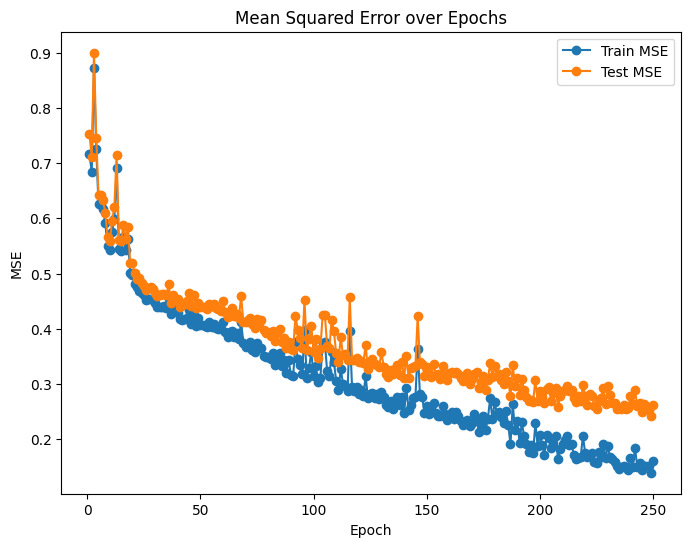

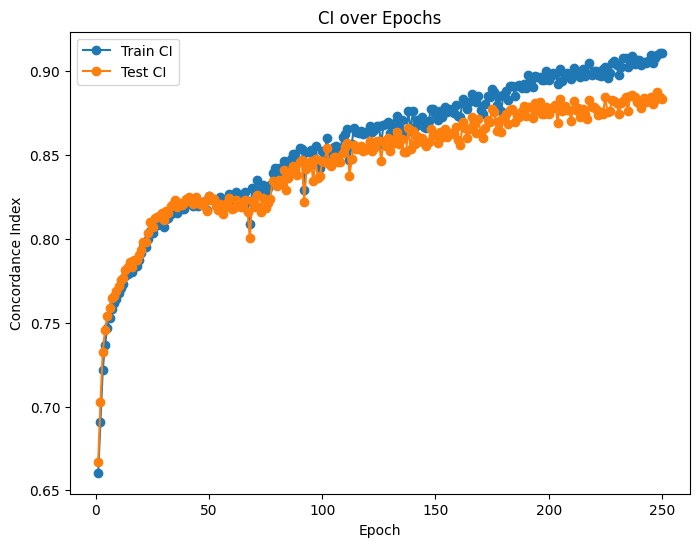

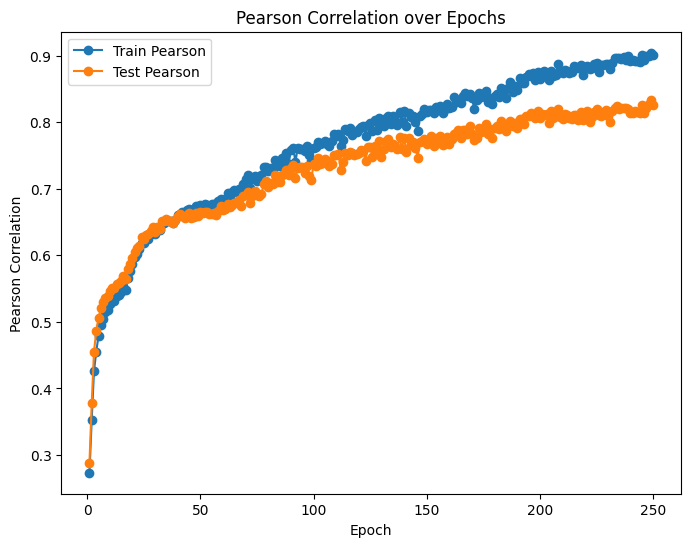

In [3]:
#model 1
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################


class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()

        print('GNNNet Loaded')
        self.n_output = n_output
        self.mol_conv1 = GCNConv(num_features_mol, num_features_mol)
        self.mol_conv2 = GCNConv(num_features_mol, num_features_mol * 2)
        self.mol_conv3 = GCNConv(num_features_mol * 2, num_features_mol * 4)
        self.mol_fc_g1 = torch.nn.Linear(num_features_mol * 4, 1024)
        self.mol_fc_g2 = torch.nn.Linear(1024, output_dim)

        # self.pro_conv1 = GCNConv(embed_dim, embed_dim)
        self.pro_conv1 = GCNConv(num_features_pro, num_features_pro)
        self.pro_conv2 = GCNConv(num_features_pro, num_features_pro * 2)
        self.pro_conv3 = GCNConv(num_features_pro * 2, num_features_pro * 4)
        # self.pro_conv4 = GCNConv(embed_dim * 4, embed_dim * 8)
        self.pro_fc_g1 = torch.nn.Linear(num_features_pro * 4, 1024)
        self.pro_fc_g2 = torch.nn.Linear(1024, output_dim)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

        # combined layers
        self.fc1 = nn.Linear(2 * output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data_mol, data_pro):
        # get graph input
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # get protein input
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch



        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)
        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv2(x, mol_edge_index)
        x = self.relu(x)
        # mol_edge_index, _ = dropout_adj(mol_edge_index, training=self.training)
        x = self.mol_conv3(x, mol_edge_index)
        x = self.relu(x)
        x = gep(x, mol_batch)  # global pooling

        # flatten
        x = self.relu(self.mol_fc_g1(x))
        x = self.dropout(x)
        x = self.mol_fc_g2(x)
        x = self.dropout(x)
        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)
        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv2(xt, target_edge_index)
        xt = self.relu(xt)
        # target_edge_index, _ = dropout_adj(target_edge_index, training=self.training)
        xt = self.pro_conv3(xt, target_edge_index)
        xt = self.relu(xt)

        # xt = self.pro_conv4(xt, target_edge_index)
        # xt = self.relu(xt)
        xt = gep(xt, target_batch)  # global pooling

        # flatten
        xt = self.relu(self.pro_fc_g1(xt))
        xt = self.dropout(xt)
        xt = self.pro_fc_g2(xt)
        xt = self.dropout(xt)

        # print("sizes of out coming gnns",x.size(), xt.size())
        # concat
        xc = torch.cat((x, xt), 1)
        # print('after concat',xc.size())
        # add some dense layers
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        return out

##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModel1')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 200
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModel1'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModel1')

